#Instalacion Librerias

In [ ]:
!pip3 install implicit

  Using cached implicit-0.7.2.tar.gz (70 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for implicit: filename=implicit-0.7.2-cp312-cp312-linux_x86_64.whl size=10797483 sha256=bebe6c7761fed583ad5258a2d7ed2f0c9a19338978b950b57edddc4bedd5e7c8
  Stored in directory: /root/.cache/pip/wheels/b2/00/4f/9ff8af07a0a53ac6007ea5d739da19cfe147a2df542b6899f8
Successfully built implicit


In [ ]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.4/357.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.52.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.
firebase-admin 6.9.0 requir

#Importacion de Librerias

In [ ]:
import implicit #separarlo para no tener que descargarlo cada vez

In [ ]:
from codecarbon import EmissionsTracker

In [ ]:
import logging

codecarbon_logger = logging.getLogger("codecarbon")

codecarbon_logger.setLevel(logging.CRITICAL)

In [ ]:
tracker = EmissionsTracker()
tracker.start()
for _ in range(1000000):
    pass
tracker.stop()

emissions = tracker.final_emissions



[codecarbon WARNING @ 00:26:41] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:26:41] [setup] RAM Tracking...
[codecarbon INFO @ 00:26:41] [setup] CPU Tracking...
[codecarbon WARNING @ 00:26:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 00:26:42] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 00:26:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 00:26:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:26:42] [setup] GPU Tracking...
[codecarbon INFO @ 00:26:42] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:26:42] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

In [ ]:
import os
import zipfile
import time

import random
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from numpy import log2



##Quick start


Código completo para no correr una por una las celdas

In [ ]:
import os
import zipfile
import time

import random
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from numpy import log2

def average_precision_at_k(relevance_vector, k):

  def precision_at_k(ranking, k):
    assert 1 <= k <= ranking.size
    return np.asarray(ranking)[:k].mean()


  total_sum = 0
  relevance_vector = np.asarray(relevance_vector)
  n_relevant = sum(relevance_vector)
  if n_relevant == 0:
    return 0

  for i in range(k):
    total_sum += precision_at_k(relevance_vector, i+1) * relevance_vector[i]
  return total_sum / min(k, n_relevant)

def ndcg_at_k(relevance_vector, k):

  if relevance_vector.sum() == 0:
    return 0

  def dcg_at_k(ranking, k):
    total_sum = 0
    ranking = np.asarray(ranking)[:k]
    for i in range(len(ranking)):
      total_sum += ranking[i] / np.log2(i+2) # +2 porque i parte en 1 y se le suma 1
    return total_sum


  dcg = dcg_at_k(relevance_vector, k)
  idcg = dcg_at_k(sorted(relevance_vector, reverse=True), k)
  return dcg / idcg


def diversity(recomended_items):
  categories = set()
  for item_id in recomended_items:
    #Se ignoran los items que no se encuentren en el set de validacion
    if item_id not in item_genre_dict:
      continue
    for category in item_genre_dict[item_id]:
      categories.add(category)
  return len(categories)



def novelty_val(recomended_items):
  novelty = 0
  for item_id in recomended_items:
    #Se ignoran los items que no se encuentren en el set de validacion
    if item_id not in item_popularity_dict:
      continue

    novelty += log2(1/ item_popularity_dict[item_id])
  return novelty / len(recomended_items)



dataset = "ml-1m"

file_name = f'{dataset}.zip'
download_url = f'http://files.grouplens.org/datasets/movielens/{file_name}'

if not os.path.exists(file_name):
    print(f"Downloading {file_name}...")
    !wget {download_url}
else:
    print(f"{file_name} already exists.")

zip_file_path = file_name

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()


if dataset == "ml-100k":
    ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
elif dataset == "ml-1m":
    ratings_df = pd.read_csv('ml-1m/ratings.dat', sep='::', names=['user_id', 'item_id', 'rating', 'timestamp'], engine='python')
elif dataset == "ml-20m":
    ratings_df = pd.read_csv('ml-20m/ratings.csv')
    ratings_df.rename(columns={'userId': 'user_id', 'movieId': 'item_id'}, inplace=True)


if dataset == "ml-100k":

    movie_cols = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL',
                  'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                  'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    movies_df = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=movie_cols)
    genre_cols = movie_cols[5:]
    item_genre_dict = {}

    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = [genre for genre in genre_cols if row[genre] == 1]
        item_genre_dict[item_id] = genres

elif dataset == "ml-1m":
    movies_df = pd.read_csv('ml-1m/movies.dat', sep='::', encoding='latin-1', names=['item_id', 'title', 'genres'], engine='python')
    item_genre_dict = {}
    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = row['genres'].split('|') if pd.notna(row['genres']) else []
        item_genre_dict[item_id] = genres

elif dataset == "ml-20m":
    movies_df = pd.read_csv('ml-20m/movies.csv')
    movies_df.rename(columns={'movieId': 'item_id'}, inplace=True)

    item_genre_dict = {}
    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = row['genres'].split('|') if pd.notna(row['genres']) else []
        item_genre_dict[item_id] = genres

uir_df = ratings_df[['user_id', 'item_id', 'rating']]

train_df, test_df = train_test_split(uir_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))


train_df_relevance = train_df.copy()
val_df_relevance = val_df.copy()
test_df_relevance = test_df.copy()

train_df_relevance['rating'] = [1 if x >= 3 else 0 for x in train_df_relevance['rating']]
val_df_relevance['rating'] = [1 if x >= 3 else 0 for x in val_df_relevance['rating']]
test_df_relevance['rating'] = [1 if x >= 3 else 0 for x in test_df_relevance['rating']]

user_ids = train_df['user_id'].unique()
item_ids = train_df['item_id'].unique()

user_id_map = {original_id: index for index, original_id in enumerate(user_ids)}
item_id_map = {original_id: index for index, original_id in enumerate(item_ids)}


train_df['user_index'] = train_df['user_id'].map(user_id_map)
train_df['item_index'] = train_df['item_id'].map(item_id_map)

user_item_matrix = csr_matrix((train_df['rating'], (train_df['user_index'], train_df['item_index'])))

user_item_train = train_df.groupby('user_id')['item_id'].apply(set).to_dict()
user_item_val = val_df.groupby('user_id')['item_id'].apply(set).to_dict()
user_item_test = test_df.groupby('user_id')['item_id'].apply(set).to_dict()

item_popularity = ratings_df['item_id'].value_counts()
total_ratings = len(ratings_df)
item_popularity_dict = (item_popularity / total_ratings).to_dict()

ctx = {
  "user_id_map": user_id_map,
  "user_item_matrix": user_item_matrix,
  "user_item_val": user_item_val,
  "user_item_test": user_item_test,
  "index_to_item_id": {idx: iid for iid, idx in item_id_map.items()}
}

def get_rel_vector(model, n, user_id, library_or_type, ctx, val=False):

    """
    Devuelve:
      - rel_vector: array bool de largo n indicando si cada ítem recomendado es relevante.
      - rec_items: lista de item_id recomendados (IDs originales).

    Usa:
      - Si library_or_type == 'implicit': model.recommend(...) con la fila del usuario.
      - Si 'random'/'popular': model.reccomend(tipo, n).
      - Ground truth: ctx["user_item_val"] si val=True, sino ctx["user_item_test"].

    Notas:
      - Si el usuario no tiene ground truth o no está en user_id_map (cold-start), retorna
        un vector de ceros y lista vacía.
      - ctx debe incluir: user_id_map, user_item_matrix, user_item_val, user_item_test,
        index_to_item_id.
    """

    m = ctx
    relevant_items = (m["user_item_val"] if val else m["user_item_test"]).get(user_id, set())

    empty_rel = np.zeros(n, dtype=bool)
    empty_list = []

    if not relevant_items:
        return empty_rel, empty_list

    if library_or_type == 'implicit':
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list
        urow = m["user_id_map"][user_id]


        user_row = m["user_item_matrix"][urow]

        rec_indices, _ = model.recommend(urow, user_row, N=n, recalculate_user=True)

        rec_items = [m["index_to_item_id"][i] for i in rec_indices]

        user_row = m["user_item_matrix"][urow]


    elif library_or_type == "tensorflow":
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list

        rec_items = deepfm_recommend_top_k(model, train_df, user_id, n)

    elif library_or_type == "multivae":
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list

        reccomendations = m["multivae_rec"]
        user_idx = m["user_id_map"][user_id]
        rec_items = reccomendations[user_idx]


    else: # "random" / "popular"
        rec_items = model.reccomend(library_or_type, n)

    rel_vector = np.isin(rec_items, list(relevant_items))
    return (rel_vector, rec_items)


def get_base_metrics(model, n, library_or_type, ctx, val = False):

  """
    Calcula promedios sobre usuarios de:
      - AP@N, nDCG@N
      - Diversidad (géneros únicos en el Top-N)
      - Novedad (menos popular = más novedoso)

    Flujo:
      - Toma usuarios de validación (val=True) o test (val=False).
      - Para cada usuario: obtiene (rel_vector, rec_items) con get_rel_vector(...),
        acumula AP@N, nDCG@N, diversidad y novedad.
      - Devuelve los cuatro promedios.

    Retorna:
      (mean_ap, mean_ndcg, mean_div, mean_nov)
  """
  m = ctx

  mean_ap = 0
  mean_ndcg = 0
  mean_div = 0
  mean_nov = 0

  users_to_evaluate = (m["user_item_val"].keys() if val else m["user_item_test"].keys())
  num = len(users_to_evaluate)
  for user_id in users_to_evaluate:
    rel_vec, rec_items = get_rel_vector(model, n, user_id, library_or_type, m, val)
    mean_ap   += average_precision_at_k(rel_vec, n)
    mean_ndcg += ndcg_at_k(rel_vec, n)
    mean_div  += diversity(rec_items)
    mean_nov  += novelty_val(rec_items)

  return mean_ap/num, mean_ndcg/num, mean_div/num, mean_nov/num


# Valores 1m
most_popular_mean_ap = 0.2180229884453128
most_popular_mean_ndcg = 0.31021530070266534
most_popular_mean_diversity = 9.0
most_popular_mean_novelty = 8.485590189089598


# Valores 1m
mean_ap_random = 0.02476888682085766
mean_ndcg_random = 0.038291186854705075
mean_diversity = 8.68611129513084
mean_novelty = 13.307681594916744


mean_ap_random =0.02476888682085766
mean_ndcg_random = 0.038291186854705075
mean_carbon_intensity=305.625
#ls_default_time está en segundos, y energy_consumption_t4 en W. Por eso debes dividir por 1000 y por 3600 (no solo por 1000).

def get_co2e_metrics(map_val, ndcg_val,
                     map_random_baseline, ndcg_random_baseline, co2e_tracker):
    co2e = co2e_tracker * 1000 #convertir de kg a g
    map_c  = (map_val  - map_random_baseline)  / co2e * 100.0
    ndcg_c = (ndcg_val - ndcg_random_baseline) / co2e * 100.0
    return map_c, ndcg_c, co2e



def filter_for_efficiency_in_each_metric(results_list):

    sorted_by_ndcg_c = sorted(results_list, key=lambda x: x['ndcg_c'], reverse=True)
    sorted_by_map_c = sorted(results_list, key=lambda x: x['map_c'], reverse=True)

    best_ndcg_c = sorted_by_ndcg_c[0]
    best_map_c = sorted_by_map_c[0]

    return {
        'best_ndcg_c': best_ndcg_c,
        'best_map_c': best_map_c
    }

def pareto_filter(results_list, metric, co2_key='co2e'):
    sorted_results = sorted(results_list, key=lambda x: x[co2_key])
    frontier = []
    best_val = -float('inf')
    for r in sorted_results:
        if r[metric] > best_val:
            frontier.append(r)
            best_val = r[metric]

    frontier = sorted(frontier, key=lambda x: x[metric])

    return frontier



--2025-11-29 15:38:04--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.grouplens.org/datasets/movielens/ml-1m.zip [following]
--2025-11-29 15:38:04--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  13.0MB/s    in 0.4s    

2025-11-29 15:38:05 (13.0 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Training set size: 600125
Validation set size: 200042
Test set size: 200042


#Metricas

### AP@K

In [ ]:
def average_precision_at_k(relevance_vector, k):

  def precision_at_k(ranking, k):
    assert 1 <= k <= ranking.size
    return np.asarray(ranking)[:k].mean()


  total_sum = 0
  relevance_vector = np.asarray(relevance_vector)
  n_relevant = sum(relevance_vector)
  if n_relevant == 0:
    return 0

  for i in range(k):
    total_sum += precision_at_k(relevance_vector, i+1) * relevance_vector[i]
  return total_sum / min(k, n_relevant)

### NDCG@K

In [ ]:
def ndcg_at_k(relevance_vector, k):

  if relevance_vector.sum() == 0:
    return 0

  def dcg_at_k(ranking, k):
    total_sum = 0
    ranking = np.asarray(ranking)[:k]
    for i in range(len(ranking)):
      total_sum += ranking[i] / np.log2(i+2) # +2 porque i parte en 1 y se le suma 1
    return total_sum


  dcg = dcg_at_k(relevance_vector, k)
  idcg = dcg_at_k(sorted(relevance_vector, reverse=True), k)
  return dcg / idcg

### Diversity

In [ ]:
def diversity(recomended_items):
  categories = set()
  for item_id in recomended_items:
    #Se ignoran los items que no se encuentren en el set de validacion
    if item_id not in item_genre_dict:
      continue
    for category in item_genre_dict[item_id]:
      categories.add(category)
  return len(categories)

### Novelty

In [ ]:
def novelty_val(recomended_items):
  novelty = 0
  for item_id in recomended_items:
    #Se ignoran los items que no se encuentren en el set de validacion
    if item_id not in item_popularity_dict:
      continue

    novelty += log2(1/ item_popularity_dict[item_id])
  return novelty / len(recomended_items)

# Cargar datos

In [ ]:
dataset = "ml-1m" #@param ["ml-100k", "ml-1m", "ml-20m"]

file_name = f'{dataset}.zip'
download_url = f'http://files.grouplens.org/datasets/movielens/{file_name}'

if not os.path.exists(file_name):
    print(f"Downloading {file_name}...")
    !wget {download_url}
else:
    print(f"{file_name} already exists.")

zip_file_path = file_name

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

--2025-11-21 21:03:37--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.grouplens.org/datasets/movielens/ml-20m.zip [following]
--2025-11-21 21:03:37--  https://files.grouplens.org/datasets/movielens/ml-20m.zip
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  77.1MB/s    in 2.5s    

2025-11-21 21:03:40 (77.1 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



#Construccion de DataFrame


In [ ]:
if dataset == "ml-100k":
    ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
elif dataset == "ml-1m":
    ratings_df = pd.read_csv('ml-1m/ratings.dat', sep='::', names=['user_id', 'item_id', 'rating', 'timestamp'], engine='python')
elif dataset == "ml-20m":
    ratings_df = pd.read_csv('ml-20m/ratings.csv')
    ratings_df.rename(columns={'userId': 'user_id', 'movieId': 'item_id'}, inplace=True)

ratings_df.head()

,user_id,item_id,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## Cargar generos

In [ ]:
if dataset == "ml-100k":

    movie_cols = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL',
                  'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                  'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    movies_df = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=movie_cols)
    genre_cols = movie_cols[5:]
    item_genre_dict = {}

    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = [genre for genre in genre_cols if row[genre] == 1]
        item_genre_dict[item_id] = genres

elif dataset == "ml-1m":
    movies_df = pd.read_csv('ml-1m/movies.dat', sep='::', encoding='latin-1', names=['item_id', 'title', 'genres'], engine='python')
    item_genre_dict = {}
    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = row['genres'].split('|') if pd.notna(row['genres']) else []
        item_genre_dict[item_id] = genres

elif dataset == "ml-20m":
    movies_df = pd.read_csv('ml-20m/movies.csv')
    movies_df.rename(columns={'movieId': 'item_id'}, inplace=True)

    item_genre_dict = {}
    for index, row in movies_df.iterrows():
        item_id = row['item_id']
        genres = row['genres'].split('|') if pd.notna(row['genres']) else []
        item_genre_dict[item_id] = genres


##Crear split entrenamiento, validación y test

In [ ]:
uir_df = ratings_df[['user_id', 'item_id', 'rating']]

train_df, test_df = train_test_split(uir_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Training set size: 12000157
Validation set size: 4000053
Test set size: 4000053


In [ ]:
print(test_df['user_id'].nunique())

138339


# Crear datos de relevacia e interacción


In [ ]:
train_df_relevance = train_df.copy()
test_df_relevance = test_df.copy()

train_df_relevance['rating'] = [1 if x >= 3 else 0 for x in train_df_relevance['rating']]
test_df_relevance['rating'] = [1 if x >= 3 else 0 for x in test_df_relevance['rating']]

## Mapeo de indices

In [ ]:
user_ids = train_df['user_id'].unique()
item_ids = train_df['item_id'].unique()

user_id_map = {original_id: index for index, original_id in enumerate(user_ids)}
item_id_map = {original_id: index for index, original_id in enumerate(item_ids)}


train_df['user_index'] = train_df['user_id'].map(user_id_map)
train_df['item_index'] = train_df['item_id'].map(item_id_map)

user_item_matrix = csr_matrix((train_df['rating'], (train_df['user_index'], train_df['item_index'])))


In [ ]:
print(user_item_matrix[:5, :10].toarray())

[[3.  0.  0.  0.  0.  5.  5.  0.  0.  0. ]
 [0.  1.5 0.  0.  3.  0.  0.  0.  0.  0. ]
 [4.  0.  4.  0.  0.  3.  0.  0.  0.  0. ]
 [0.  0.  0.  3.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  5.  4.  0.  0.  0.  0. ]]


## Mapeo de users: [items]

In [ ]:
user_item_train = train_df.groupby('user_id')['item_id'].apply(set).to_dict()
user_item_test = test_df.groupby('user_id')['item_id'].apply(set).to_dict()

## Obtener popularidad de los items

In [ ]:
item_popularity = ratings_df['item_id'].value_counts()
total_ratings = len(ratings_df)
item_popularity_dict = (item_popularity / total_ratings).to_dict()

#Creacion de Contexto

In [ ]:
ctx = {
  "user_id_map": user_id_map,
  "user_item_matrix": user_item_matrix,
  "user_item_test": user_item_test,
  "index_to_item_id": {idx: iid for iid, idx in item_id_map.items()}
}

# Funciones de recomendación

In [ ]:
def get_rel_vector(model, n, user_id, library_or_type, ctx, val=False):

    """
    Devuelve:
      - rel_vector: array bool de largo n indicando si cada ítem recomendado es relevante.
      - rec_items: lista de item_id recomendados (IDs originales).

    Usa:
      - Si library_or_type == 'implicit': model.recommend(...) con la fila del usuario.
      - Si 'random'/'popular': model.reccomend(tipo, n).
      - Ground truth: ctx["user_item_val"] si val=True, sino ctx["user_item_test"].

    Notas:
      - Si el usuario no tiene ground truth o no está en user_id_map (cold-start), retorna
        un vector de ceros y lista vacía.
      - ctx debe incluir: user_id_map, user_item_matrix, user_item_val, user_item_test,
        index_to_item_id.
    """

    m = ctx
    relevant_items = (m["user_item_test"]).get(user_id, set())

    empty_rel = np.zeros(n, dtype=bool)
    empty_list = []

    if not relevant_items:
        return empty_rel, empty_list

    if library_or_type == 'implicit':
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list
        urow = m["user_id_map"][user_id]


        user_row = m["user_item_matrix"][urow]

        rec_indices, _ = model.recommend(urow, user_row, N=n, recalculate_user=True)

        rec_items = [m["index_to_item_id"][i] for i in rec_indices]

        user_row = m["user_item_matrix"][urow]


    elif library_or_type == "tensorflow":
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list

        rec_items = deepfm_recommend_top_k(model, train_df, user_id, n)

    elif library_or_type == "multivae":
        if user_id not in m["user_id_map"]:
            return empty_rel, empty_list

        reccomendations = m["multivae_rec"]
        user_idx = m["user_id_map"][user_id]
        rec_items = reccomendations[user_idx]


    else: # "random" / "popular"
        rec_items = model.reccomend(library_or_type, n)

    rel_vector = np.isin(rec_items, list(relevant_items))
    return (rel_vector, rec_items)

## Metricas base promedio

In [ ]:
def get_base_metrics(model, n, library_or_type, ctx, val = False, sample_size = -1):

  """
    Calcula promedios sobre usuarios de:
      - AP@N, nDCG@N
      - Diversidad (géneros únicos en el Top-N)
      - Novedad (menos popular = más novedoso)

    Flujo:
      - Toma usuarios de validación (val=True) o test (val=False).
      - Para cada usuario: obtiene (rel_vector, rec_items) con get_rel_vector(...),
        acumula AP@N, nDCG@N, diversidad y novedad.
      - Devuelve los cuatro promedios.

    Retorna:
      (mean_ap, mean_ndcg, mean_div, mean_nov)
  """
  m = ctx

  mean_ap = 0
  mean_ndcg = 0
  mean_div = 0
  mean_nov = 0

  users_to_evaluate = m["user_item_test"].keys()

  #checkpoint

  if sample_size > 0:
    users_to_evaluate = random.sample(list(users_to_evaluate), sample_size)

  num = len(users_to_evaluate)
  counter = 0
  for user_id in users_to_evaluate:
    rel_vec, rec_items = get_rel_vector(model, n, user_id, library_or_type, m, val)

    if rel_vec.size == 0 or rec_items == []:
      counter += 1
      continue

    mean_ap   += average_precision_at_k(rel_vec, n)
    mean_ndcg += ndcg_at_k(rel_vec, n)
    mean_div  += diversity(rec_items)
    mean_nov  += novelty_val(rec_items)
  print(counter)
  return mean_ap/num, mean_ndcg/num, mean_div/num, mean_nov/num

# Recomendador base

In [ ]:
class RecomendadorBase:
  def __init__(self):
    pass

  def reccomend(self, reccomender_type, n):
    if reccomender_type == "random":
        rec = random.sample(list(item_id_map.keys()), n)
    elif reccomender_type == "popular":
        rec = list(item_popularity.index[:n])
    return rec

# Baseline popular

In [ ]:

mean_ap, mean_ndcg, mean_diversity, mean_novelty = get_base_metrics(RecomendadorBase(), 10, "popular", ctx)
print("Mean AP:", mean_ap)
print("Mean NDCG:", mean_ndcg)
print("Mean Diversity:", mean_diversity)
print("Mean Novelty:", mean_novelty)

Mean AP: 0.19047543300441777
Mean NDCG: 0.27620591009070855
Mean Diversity: 10.0
Mean Novelty: 8.433525657279976


Guardar valores

In [ ]:

# Valores 1m
most_popular_mean_ap = 0.2180229884453128
most_popular_mean_ndcg = 0.31021530070266534
most_popular_mean_diversity = 9.0
most_popular_mean_novelty = 8.485590189089598

# Baseline random

In [ ]:
mean_ap_random = 0
mean_ndcg_random = 0
mean_diversity_random = 0
mean_novelty_random = 0


mean_ap_i, mean_ndcg_i, mean_diversity_i, mean_novelty_i = get_base_metrics(RecomendadorBase(), 10, "random",ctx)
mean_ap_random += mean_ap_i
mean_ndcg_random += mean_ndcg_i
mean_diversity_random += mean_diversity_i
mean_novelty_random += mean_novelty_i

mean_ap_random = mean_ap_random
mean_ndcg_random = mean_ndcg_random
mean_diversity_random = mean_diversity_random
mean_novelty_random = mean_novelty_random

print("Mean AP:", mean_ap_random)
print("Mean NDCG:", mean_ndcg_random)
print("Mean Diversity:", mean_diversity_random)
print("Mean Novelty:", mean_novelty_random)

Mean AP: 0.0034571059452871557
Mean NDCG: 0.005306912032865271
Mean Diversity: 10.082355662539126
Mean Novelty: 19.030679810258064


Guardar valores.

In [ ]:
# Valores 1m
mean_ap_random = 0.02476888682085766
mean_ndcg_random = 0.038291186854705075
mean_diversity = 8.68611129513084
mean_novelty = 13.307681594916744

# Métrica CO2E

In [ ]:
def get_co2e_metrics(map_val, ndcg_val,
                     map_random_baseline, ndcg_random_baseline, co2e):
    co2e = co2e * 1000 #convertir de kg a g
    map_c  = (map_val  - map_random_baseline)  / co2e * 100.0
    ndcg_c = (ndcg_val - ndcg_random_baseline) / co2e * 100.0
    return map_c, ndcg_c, co2e

# Métrica Base con modelo ALS con hiperparámetos por defecto

Hipeparametros por defecto: factors = 100, regularization = 0.01 (https://benfred.github.io/implicit/api/models/cpu/als.html)

*Usar T4*

In [ ]:

default_als = implicit.als.AlternatingLeastSquares(use_gpu=True)
training_start = time.time()
default_als.fit(user_item_matrix)
training_end = time.time()
als_default_time = training_end - training_start

print("Training time:", als_default_time)

  0%|          | 0/15 [00:00<?, ?it/s]

Training time: 0.7303237915039062


In [ ]:
# Evaluación del modelo ALS por defecto
mean_ap, mean_ndcg, mean_diversity, mean_novelty = get_base_metrics(
    model=default_als,
    n=10,
    library_or_type="implicit",
    ctx=ctx,
    val=False  # usa test; pon True si quieres validación
)
# Cálculo de eficiencia/CO2E
map_c, ndcg_c, co2e = get_co2e_metrics(
    map_val=mean_ap,
    ndcg_val=mean_ndcg,
    time_seconds=als_default_time,
    power_watts=energy_consumption_t4,
    carbon_intensity_g_per_kwh=mean_carbon_intensity,
    map_random_baseline=mean_ap_random,
    ndcg_random_baseline=mean_ndcg_random
)

print("Mean AP:", mean_ap)
print("Mean NDCG:", mean_ndcg)
print("Mean Diversity:", mean_diversity)
print("Mean Novelty:", mean_novelty)
print("CO2E (gCO2):", co2e)
print("MAP-C (%):", map_c)
print("NDCG-C (%):", ndcg_c)

Mean AP: 0.40300319018121766
Mean NDCG: 0.5430370537310649
Mean Diversity: 8.878602186154355
Mean Novelty: 9.735002981182953
CO2E (gCO2): 0.0043401012818018595
MAP-C (%): 8440.00873628549
NDCG-C (%): 11205.25282321226


# Modelo BPR con hiperparámetos por defecto

In [ ]:
model_bpr = implicit.bpr.BayesianPersonalizedRanking(
    factors=400,          # latentes
    iterations=40,        # epochs
    learning_rate=0.05,   # (default suele ir bien)
    regularization=0.01,  # opcional
    random_state=42,      # reproducibilidad
    use_gpu=True
)

bpr_start = time.time()
model_bpr.fit(user_item_matrix)
bpr_end = time.time()
bpr_time = bpr_end - bpr_start
print("BPR training time (s):", bpr_time)

# 2) Evaluacion
mean_ap_bpr, mean_ndcg_bpr, mean_div_bpr, mean_nov_bpr = get_base_metrics(
    model=model_bpr,
    n=10,
    library_or_type="implicit",
    ctx=ctx,
    val=False      # usa test; pon True para validación
)

# 3) Métrica de CO2 y eficiencias -C
map_c_bpr, ndcg_c_bpr, co2e_bpr = get_co2e_metrics(
    map_val=mean_ap_bpr,
    ndcg_val=mean_ndcg_bpr,
    time_seconds=bpr_time,
    power_watts=energy_consumption_t4,
    carbon_intensity_g_per_kwh=mean_carbon_intensity,
    map_random_baseline=mean_ap_random,
    ndcg_random_baseline=mean_ndcg_random
)

print("BPR — AP@10:", mean_ap_bpr)
print("BPR — nDCG@10:", mean_ndcg_bpr)
print("BPR — Diversity:", mean_div_bpr)
print("BPR — Novelty:", mean_nov_bpr)
print("BPR — CO2E (g):", co2e_bpr)
print("BPR — MAP-C (%):", map_c_bpr)
print("BPR — NDCG-C (%):", ndcg_c_bpr)

  0%|          | 0/40 [00:00<?, ?it/s]

BPR training time (s): 1.9260618686676025
BPR — AP@10: 0.26382138165891594
BPR — nDCG@10: 0.3756070814730159
BPR — Diversity: 6.547697913216297
BPR — Novelty: 11.570693345805829
BPR — CO2E (g): 0.011446023917446535
BPR — MAP-C (%): 1984.2970839788538
BPR — NDCG-C (%): 2786.027282934995


# Filtros de resultados

Filtrar para obtener el menor valor co2 para las métricas ndcg y map. Es decir, si para un valor de ndcg se obtiene un valor co2#1 y otro modelo tiene un valor mayor de ndcg con co2#2 < co2#1, se elimina el primer modelo.

In [ ]:
def filter_for_efficiency_in_each_metric(results_list):

    sorted_by_ndcg_c = sorted(results_list, key=lambda x: x['ndcg_c'], reverse=True)
    sorted_by_map_c = sorted(results_list, key=lambda x: x['map_c'], reverse=True)

    best_ndcg_c = sorted_by_ndcg_c[0]
    best_map_c = sorted_by_map_c[0]

    return {
        'best_ndcg_c': best_ndcg_c,
        'best_map_c': best_map_c
    }

def pareto_filter(results_list, metric, co2_key='co2e'):
    sorted_results = sorted(results_list, key=lambda x: x[co2_key])
    frontier = []
    best_val = -float('inf')
    for r in sorted_results:
        if r[metric] > best_val:
            frontier.append(r)
            best_val = r[metric]

    frontier = sorted(frontier, key=lambda x: x[metric])

    return frontier


# Pruebas con ALS

In [ ]:
# Configuraciones ya testeadas

import itertools

factors_values = [30, 50, 100]
regularization_values = [0.001, 0.01, 0.1]

already_tested_als_configurations = []
for factors, regularization in itertools.product(factors_values, regularization_values):
    already_tested_als_configurations.append({'factors': factors, 'regularization': regularization})



In [ ]:
import itertools

factors_values = [30, 50, 100, 150]
regularization_values = [0.0001, 0.001, 0.01, 0.1]

als_configurations = []
for factors, regularization in itertools.product(factors_values, regularization_values):
    if {'factors': factors, 'regularization': regularization} in already_tested_als_configurations:
      continue

    als_configurations.append({'factors': factors, 'regularization': regularization})


In [ ]:
model_results = []
n = 10
for config in als_configurations:

  tracker = EmissionsTracker()
  tracker.start()
  training_start = time.time()
  als = implicit.als.AlternatingLeastSquares(factors=config['factors'], regularization=config['regularization'], use_gpu=True)
  als.fit(user_item_matrix)
  tracker.stop()
  training_end = time.time()
  als_time = training_end - training_start
  co2e_tracker = tracker.final_emissions
  mean_ap, mean_ndcg, mean_diversity, mean_novelty = get_base_metrics(als, n, "implicit", ctx)
  map_c, ndcg_c, co2e = get_co2e_metrics(
      mean_ap,
      mean_ndcg,
      mean_ap_random,
      mean_ndcg_random,
      co2e_tracker)

  als_results_dict ={
      'factors': config['factors'],
      'regularization': config['regularization'],
      'mean_ap': mean_ap,
      'mean_ndcg': mean_ndcg,
      'mean_diversity': mean_diversity,
      'mean_novelty': mean_novelty,
      'co2e': co2e,
      'map_c': map_c,
      'ndcg_c': ndcg_c,
      'time': als_time
  }

  model_results.append(als_results_dict)


[codecarbon WARNING @ 19:25:27] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:25:27] [setup] RAM Tracking...
[codecarbon INFO @ 19:25:27] [setup] CPU Tracking...
[codecarbon WARNING @ 19:25:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:25:29] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 19:25:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon WARNING @ 19:25:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 19:25:29] [setup] GPU Tracking...
[codecarbon INFO @ 19:25:29] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:25:29] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:25:29] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:25:29] Delta energy consumed for CPU with constant : 0.000003 kWh, power : 42.5 W
[codecarbon INFO @ 19:25:29] Energy consumed for All CPU : 0.000003 kWh
[codecarbon INFO @ 19:25:29] Energy consumed for all GPUs : 0.000002 kWh. Total GPU Power : 33.904456080166504 W
[codecarbon INFO @ 19:25:29] 0.000006 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:25:48] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:25:48] [setup] RAM Tracking...
[codecarbon INFO @ 19:25:48] [setup] CPU Tracking...
[codecarbon WARNING @ 19:25:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:25:49] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readab

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:25:49] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:25:49] Delta energy consumed for CPU with constant : 0.000003 kWh, power : 42.5 W
[codecarbon INFO @ 19:25:49] Energy consumed for All CPU : 0.000003 kWh
[codecarbon INFO @ 19:25:49] Energy consumed for all GPUs : 0.000005 kWh. Total GPU Power : 81.97883402368481 W
[codecarbon INFO @ 19:25:49] 0.000009 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:26:10] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:26:10] [setup] RAM Tracking...
[codecarbon INFO @ 19:26:10] [setup] CPU Tracking...
[codecarbon WARNING @ 19:26:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:26:11] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:26:11] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:26:11] Delta energy consumed for CPU with constant : 0.000003 kWh, power : 42.5 W
[codecarbon INFO @ 19:26:11] Energy consumed for All CPU : 0.000003 kWh
[codecarbon INFO @ 19:26:11] Energy consumed for all GPUs : 0.000006 kWh. Total GPU Power : 69.92758266723575 W
[codecarbon INFO @ 19:26:11] 0.000010 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:26:33] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:26:33] [setup] RAM Tracking...
[codecarbon INFO @ 19:26:33] [setup] CPU Tracking...
[codecarbon WARNING @ 19:26:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:26:34] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:26:35] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:26:35] Delta energy consumed for CPU with constant : 0.000005 kWh, power : 42.5 W
[codecarbon INFO @ 19:26:35] Energy consumed for All CPU : 0.000005 kWh
[codecarbon INFO @ 19:26:35] Energy consumed for all GPUs : 0.000009 kWh. Total GPU Power : 72.37630550420354 W
[codecarbon INFO @ 19:26:35] 0.000015 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:26:58] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:26:58] [setup] RAM Tracking...
[codecarbon INFO @ 19:26:58] [setup] CPU Tracking...
[codecarbon WARNING @ 19:27:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:27:00] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:27:00] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:27:00] Delta energy consumed for CPU with constant : 0.000005 kWh, power : 42.5 W
[codecarbon INFO @ 19:27:00] Energy consumed for All CPU : 0.000005 kWh
[codecarbon INFO @ 19:27:00] Energy consumed for all GPUs : 0.000008 kWh. Total GPU Power : 68.77850071730701 W
[codecarbon INFO @ 19:27:00] 0.000014 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:27:21] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:27:21] [setup] RAM Tracking...
[codecarbon INFO @ 19:27:21] [setup] CPU Tracking...
[codecarbon WARNING @ 19:27:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:27:23] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:27:23] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:27:23] Delta energy consumed for CPU with constant : 0.000005 kWh, power : 42.5 W
[codecarbon INFO @ 19:27:23] Energy consumed for All CPU : 0.000005 kWh
[codecarbon INFO @ 19:27:23] Energy consumed for all GPUs : 0.000008 kWh. Total GPU Power : 68.72677672757138 W
[codecarbon INFO @ 19:27:23] 0.000013 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 19:27:43] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:27:43] [setup] RAM Tracking...
[codecarbon INFO @ 19:27:43] [setup] CPU Tracking...
[codecarbon WARNING @ 19:27:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:27:44] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

  0%|          | 0/15 [00:00<?, ?it/s]

[codecarbon INFO @ 19:27:45] Energy consumed for RAM : 0.000001 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 19:27:45] Delta energy consumed for CPU with constant : 0.000005 kWh, power : 42.5 W
[codecarbon INFO @ 19:27:45] Energy consumed for All CPU : 0.000005 kWh
[codecarbon INFO @ 19:27:45] Energy consumed for all GPUs : 0.000008 kWh. Total GPU Power : 69.47352711121462 W
[codecarbon INFO @ 19:27:45] 0.000013 kWh of electricity and 0.000000 L of water were used since the beginning.


In [ ]:
als_results_df = pd.DataFrame(model_results)

als_results_df.to_csv('als_model_results_tracker.csv', index=False)

## Resultados ALS

In [ ]:
als_results_df = pd.read_csv('als_model_results_tracker.csv')
als_results_dict = als_results_df.to_dict('records')

In [ ]:
print(als_results_dict)

[{'factors': 30, 'regularization': 0.001, 'mean_ap': 0.432095332666147, 'mean_ndcg': 0.5757808564550035, 'mean_diversity': 8.568400132494203, 'mean_novelty': 9.40601280986805, 'co2e': 0.0041875727443256, 'map_c': 9727.029730939748, 'ndcg_c': 12835.35122652176, 'time': 0.5716454982757568}, {'factors': 30, 'regularization': 0.01, 'mean_ap': 0.4323752567930612, 'mean_ndcg': 0.5758774893380952, 'mean_diversity': 8.609473335541571, 'mean_novelty': 9.403029276279328, 'co2e': 0.0019037098393284, 'map_c': 21411.16054303661, 'ndcg_c': 28238.87818287592, 'time': 0.2322616577148437}, {'factors': 30, 'regularization': 0.1, 'mean_ap': 0.4334941145191907, 'mean_ndcg': 0.5760009843647037, 'mean_diversity': 8.577012255713813, 'mean_novelty': 9.40159664863818, 'co2e': 0.0011401044949308, 'map_c': 35849.80407634652, 'ndcg_c': 47163.20301347532, 'time': 0.1592068672180175}, {'factors': 50, 'regularization': 0.001, 'mean_ap': 0.4270322271744808, 'mean_ndcg': 0.5704370741128374, 'mean_diversity': 8.7676382

In [ ]:
best_results = filter_for_efficiency_in_each_metric(als_results_dict)
map_frontier = pareto_filter(als_results_dict, 'mean_ap')
ndcg_frontier = pareto_filter(als_results_dict, 'mean_ndcg')

# Fronteras

In [ ]:
map_frontier.sort(key=lambda x: x['map_c'])
ndcg_frontier.sort(key=lambda x: x['ndcg_c'])
print([(result["mean_ap"], result['factors'], result['regularization']) for result in map_frontier])
print([(result["mean_ndcg"], result['factors'], result['regularization']) for result in ndcg_frontier])

[(0.4334941145191907, 30, 0.1)]
[(0.5760009843647037, 30, 0.1)]


### Mejores eficiencias

In [ ]:
best_ndcg_c = best_results['best_ndcg_c']
best_map_c = best_results['best_map_c']
print("Best NDCG-C model.", f"ndcg-c: {best_ndcg_c['ndcg_c']}, factors: {best_ndcg_c['factors']}, regularization: {best_ndcg_c['regularization']}")
print("Best MAP-C model.", f"map-c: {best_map_c['map_c']}, factors: {best_map_c['factors']}, regularization: {best_map_c['regularization']}")


Best NDCG-C model. ndcg-c: 47163.20301347532, factors: 30, regularization: 0.1
Best MAP-C model. map-c: 35849.80407634652, factors: 30, regularization: 0.1


### Graficos de frontera métrica base vs co2e

/tmp/ipython-input-1778375252.py:18: RankWarning: Polyfit may be poorly conditioned
  m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)


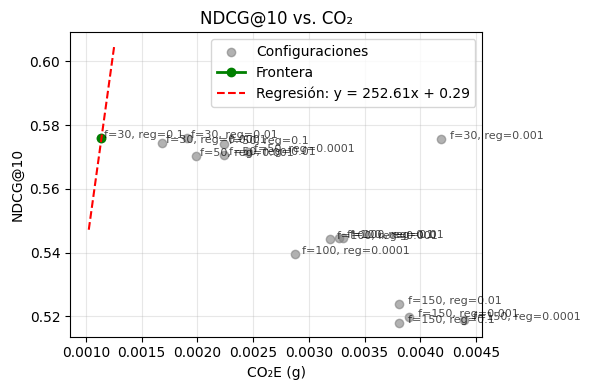

NDCG Frontier Linear Regression:
Slope (m): 252.6089
Intercept (b): 0.2880


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ndcg'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ndcg'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

/tmp/ipython-input-2242866216.py:18: RankWarning: Polyfit may be poorly conditioned
  m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)


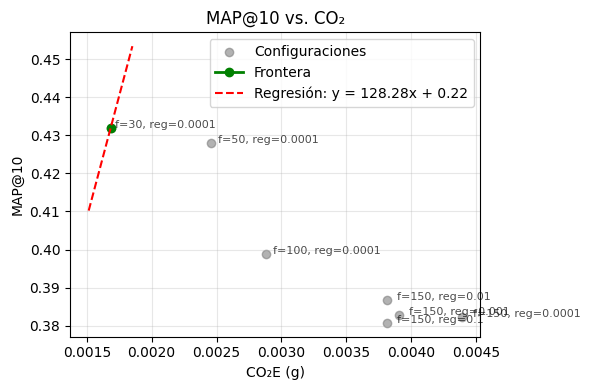

MAP Frontier Linear Regression:
Slope (m): 128.2849
Intercept (b): 0.2159


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ap'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_map = [r['co2e'] for r in map_frontier]
mean_ap_map = [r['mean_ap'] for r in map_frontier]


plt.plot(
    co2e_map,
    mean_ap_map,
    color='green', marker='o', linewidth=2, label='Frontera'
)

m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)
x_range_map = np.array([min(co2e_map) * 0.9, max(co2e_map) * 1.1])
plt.plot(x_range_map, m_map * x_range_map + b_map, color='red', linestyle='--', label=f'Regresión: y = {m_map:.2f}x + {b_map:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ap'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_map:.4f}")
print(f"Intercept (b): {b_map:.4f}")

# BPR

In [ ]:
# Resultados BPR

# ============================
# BPR: grid search y Pareto
# ============================
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import implicit

# Precomputar UNA vez (como ya tienes)
user_item_csr = user_item_matrix.tocsr()
item_user_csr = user_item_matrix.T.tocsr()

def fit_bpr(model_bpr):
    use_gpu = getattr(model_bpr, "use_gpu", False)
    if use_gpu:
        model_bpr.fit(user_item_csr)   # GPU: USER x ITEM
    else:
        model_bpr.fit(item_user_csr)   # CPU: ITEM x USER


# --- (opcional) Si no los tienes definidos arriba, descomenta estos filtros ---
def filter_for_efficiency_in_each_metric(results_list):
    sorted_by_ndcg_c = sorted(results_list, key=lambda x: x['ndcg_c'], reverse=True)
    sorted_by_map_c  = sorted(results_list, key=lambda x: x['map_c'],  reverse=True)
    return {'best_ndcg_c': sorted_by_ndcg_c[0], 'best_map_c': sorted_by_map_c[0]}

def pareto_filter(results_list, metric, co2_key='co2e'):
    sorted_results = sorted(results_list, key=lambda x: x[co2_key])
    frontier, best_val = [], -float('inf')
    for r in sorted_results:
        if r[metric] > best_val:
            frontier.append(r)
            best_val = r[metric]
    return sorted(frontier, key=lambda x: x[metric])

# -----------------------
# 1) Rejilla de BPR
# -----------------------
factors_values       = [30, 50, 100, 150]      # vectores latentes
regularization_values= [0.001, 0.01, 0.1]      # L2
learning_rates       = [0.01, 0.05]            # lr
iterations_values    = [20, 40]                # epochs

bpr_configurations = []
for f, reg, lr, it in itertools.product(
        factors_values, regularization_values, learning_rates, iterations_values):
    bpr_configurations.append({
        'factors': f, 'regularization': reg, 'learning_rate': lr, 'iterations': it
    })

# -----------------------
# 2) Entrenar + Evaluar
# -----------------------
bpr_results = []
N = 10

for cfg in bpr_configurations:
    model_bpr = implicit.bpr.BayesianPersonalizedRanking(
        factors=cfg['factors'],
        regularization=cfg['regularization'],
        learning_rate=cfg['learning_rate'],
        iterations=cfg['iterations'],
        random_state=42,
        use_gpu=True  # pon False si no tienes GPU
    )

    t0 = time.time()
    fit_bpr(model_bpr)      # <-- en vez de model_bpr.fit(user_item_matrix.T)
    t1 = time.time()
    train_time = t1 - t0

    mean_ap, mean_ndcg, mean_div, mean_nov = get_base_metrics(
        model=model_bpr, n=N, library_or_type="implicit", ctx=ctx, val=False
    )

    map_c, ndcg_c, co2e = get_co2e_metrics(
        map_val=mean_ap,
        ndcg_val=mean_ndcg,
        time_seconds=train_time,
        power_watts=energy_consumption_t4,
        carbon_intensity_g_per_kwh=mean_carbon_intensity,
        map_random_baseline=mean_ap_random,
        ndcg_random_baseline=mean_ndcg_random
    )

    bpr_results.append({
        'factors': cfg['factors'],
        'regularization': cfg['regularization'],
        'learning_rate': cfg['learning_rate'],
        'iterations': cfg['iterations'],
        'mean_ap': mean_ap,
        'mean_ndcg': mean_ndcg,
        'mean_diversity': mean_div,
        'mean_novelty': mean_nov,
        'time': train_time,
        'co2e': co2e,
        'map_c': map_c,
        'ndcg_c': ndcg_c
    })

# Guardar y recargar (si deseas persistir)
bpr_results_df = pd.DataFrame(bpr_results)
bpr_results_df.to_csv('bpr_model_results_1m.csv', index=False)

# -----------------------
# 3) Selección y fronteras
# -----------------------
bpr_results_dict = bpr_results_df.to_dict('records')

best_results = filter_for_efficiency_in_each_metric(bpr_results_dict)
map_frontier   = pareto_filter(bpr_results_dict, 'mean_ap')
ndcg_frontier  = pareto_filter(bpr_results_dict, 'mean_ndcg')

print(">> Mejor nDCG-C:", best_results['best_ndcg_c'])
print(">> Mejor MAP-C :", best_results['best_map_c'])

# -----------------------
# 4) Gráficos (a la ALS)
# -----------------------

# nDCG vs CO2
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in bpr_results_dict],
    [r['mean_ndcg'] for r in bpr_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)
co2e_ndcg = [r['co2e'] for r in ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in ndcg_frontier]
plt.plot(co2e_ndcg, mean_ndcg_ndcg, color='green', marker='o', linewidth=2, label='Frontera')

# Regresión sobre la frontera
m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg)*0.9, max(co2e_ndcg)*1.1])
plt.plot(x_range_ndcg, m_ndcg*x_range_ndcg + b_ndcg, color='red', linestyle='--',
         label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')

for r in bpr_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}, lr={r['learning_rate']}, it={r['iterations']}"
    plt.text(r['co2e']*1.02, r['mean_ndcg'], label, fontsize=7, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("nDCG@10")
plt.title("BPR — nDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('ndcgat10vsco2_bpr.png', dpi=150)
plt.show()

print("BPR nDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}  |  Intercept (b): {b_ndcg:.4f}")

# MAP vs CO2
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in bpr_results_dict],
    [r['mean_ap'] for r in bpr_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)
co2e_map = [r['co2e'] for r in map_frontier]
mean_ap_map = [r['mean_ap'] for r in map_frontier]
plt.plot(co2e_map, mean_ap_map, color='green', marker='o', linewidth=2, label='Frontera')

m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)
x_range_map = np.array([min(co2e_map)*0.9, max(co2e_map)*1.1])
plt.plot(x_range_map, m_map*x_range_map + b_map, color='red', linestyle='--',
         label=f'Regresión: y = {m_map:.2f}x + {b_map:.2f}')

for r in bpr_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}, lr={r['learning_rate']}, it={r['iterations']}"
    plt.text(r['co2e']*1.02, r['mean_ap'], label, fontsize=7, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("BPR — MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('mapat10vsco2_bpr.png', dpi=150)
plt.show()

print("BPR MAP Frontier Linear Regression:")
print(f"Slope (m): {m_map:.4f}  |  Intercept (b): {b_map:.4f}")


  0%|          | 0/20 [00:00<?, ?it/s]

ValueError: row index out of bounds for matrix

# DeepFM con Tensorflow-recommenders


In [ ]:
!    pip install tensorflow-recommenders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_recommenders as tfrs

Preprocesamiento de datos

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


unique_users = train_df["user_id"].unique()
unique_items = train_df["item_id"].unique()

user2idx = {u: i for i, u in enumerate(unique_users)}
item2idx = {i: j for j, i in enumerate(unique_items)}

idx2user = {i: u for u, i in user2idx.items()}
idx2item = {j: i for i, j in item2idx.items()}


rating_mean = train_df["rating"].mean()
rating_std = train_df["rating"].std()

train_df["rating_normalized"] = (train_df["rating"] - rating_mean) / rating_std

train_df["user_id_encoded"] = train_df["user_id"].map(user2idx)
train_df["item_id_encoded"] = train_df["item_id"].map(item2idx)

user_vocab_size = len(user2idx) + 1
item_vocab_size = len(item2idx) + 1

In [ ]:
all_genres = set()
for original_item_id in unique_items:
    genres = item_genre_dict.get(original_item_id, [])
    all_genres.update(genres)

genre2idx = {genre: idx for idx, genre in enumerate(all_genres, start=1)}
idx2genre = {idx: genre for genre, idx in genre2idx.items()}
genre_vocab_size = len(genre2idx) + 1


In [ ]:
def get_genre_features(encoded_item_id, max_genres=5):
    original_item_id = idx2item.get(encoded_item_id)

    if original_item_id is None:
        return [0] * max_genres, [0.0] * max_genres

    genres = item_genre_dict.get(original_item_id, [])
    genre_ids = [genre2idx[g] for g in genres[:max_genres]]
    genre_weights = [1.0] * len(genre_ids)

    while len(genre_ids) < max_genres:
        genre_ids.append(0)
        genre_weights.append(0.0)

    return genre_ids[:max_genres], genre_weights[:max_genres]

In [ ]:
train_genre_ids = []
train_genre_weights = []

for encoded_item_id in train_df["item_id_encoded"]:
    genre_ids, genre_weights = get_genre_features(encoded_item_id)
    train_genre_ids.append(genre_ids)
    train_genre_weights.append(genre_weights)

train_df["genre_ids"] = train_genre_ids
train_df["genre_weights"] = train_genre_weights

In [ ]:
from tensorflow.keras import layers

class DeepFMRankingModel(tfrs.models.Model):
    def __init__(self, user_vocab_size, item_vocab_size, genre_vocab_size=None, embed_dim=32,
                 deep_layers=[64, 32], learning_rate=0.001):
        super().__init__()

        self.user_embedding = layers.Embedding(
            input_dim=user_vocab_size,
            output_dim=embed_dim,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.item_embedding = layers.Embedding(
            input_dim=item_vocab_size,
            output_dim=embed_dim,
            embeddings_initializer='glorot_uniform',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )

        if genre_vocab_size is not None:
            self.genre_embedding = layers.Embedding(
                input_dim=genre_vocab_size,
                output_dim=8,
                embeddings_initializer='glorot_uniform',
                embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
            )
            self.use_genres = True
        else:
            self.use_genres = False

        self.user_bias = layers.Embedding(input_dim=user_vocab_size, output_dim=1)
        self.item_bias = layers.Embedding(input_dim=item_vocab_size, output_dim=1)
        self.global_bias = tf.Variable(0.0)

        deep_net = []
        for units in deep_layers:
            deep_net.append(layers.Dense(units, activation='relu'))
            deep_net.append(layers.Dropout(0.5))
        deep_net.append(layers.Dense(1))

        self.deep_network = tf.keras.Sequential(deep_net)

        self.task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1e-3,
            decay_steps=5000,
            decay_rate=0.96,
            staircase=True
        ))
        self.compile(optimizer=optimizer)

    def call(self, features):
        user_id = features["user_id"]
        item_id = features["item_id"]

        user_emb = self.user_embedding(user_id)
        item_emb = self.item_embedding(item_id)

        user_bias = tf.squeeze(self.user_bias(user_id), axis=-1)
        item_bias = tf.squeeze(self.item_bias(item_id), axis=-1)

        interaction = tf.reduce_sum(user_emb * item_emb, axis=1)

        fm_output = self.global_bias + user_bias + item_bias + interaction

        if self.use_genres and "genre_ids" in features and "genre_weights" in features:
            genre_ids = features["genre_ids"]
            genre_weights = features["genre_weights"]


            genre_emb = self.genre_embedding(genre_ids)
            genre_weights_expanded = tf.expand_dims(genre_weights, axis=-1)

            weighted_genre_emb = tf.reduce_sum(genre_emb * genre_weights_expanded, axis=1)

            deep_input = tf.concat([user_emb, item_emb, weighted_genre_emb], axis=1)
        else:
            deep_input = tf.concat([user_emb, item_emb], axis=1)

        deep_output = tf.squeeze(self.deep_network(deep_input), axis=-1)

        return fm_output + deep_output

    def compute_loss(self, features, training=False):
        labels = features["rating"]

        inputs = {
            "user_id": features["user_id"],
            "item_id": features["item_id"]
        }

        if "genre_ids" in features and "genre_weights" in features:
            inputs["genre_ids"] = features["genre_ids"]
            inputs["genre_weights"] = features["genre_weights"]

        predictions = self(inputs)
        return self.task(labels=labels, predictions=predictions)

In [ ]:

train_deepfm = tf.data.Dataset.from_tensor_slices({
    "user_id": train_df["user_id_encoded"].astype(np.int32).values,
    "item_id": train_df["item_id_encoded"].astype(np.int32).values,
    "genre_ids": np.array(train_df["genre_ids"].tolist(), dtype=np.int32),
    "genre_weights": np.array(train_df["genre_weights"].tolist(), dtype=np.float32),
    "rating": train_df["rating_normalized"].astype(np.float32).values,
}).batch(1024)

model = DeepFMRankingModel(
    user_vocab_size=user_vocab_size,
    item_vocab_size=item_vocab_size,
    genre_vocab_size=genre_vocab_size,
    embed_dim=32,
    deep_layers=[64, 32],
    learning_rate=0.001
)

tracker = EmissionsTracker()
tracker.start()
model.fit(train_deepfm, epochs=5)
tracker.stop()


[codecarbon WARNING @ 00:34:51] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 00:34:51] [setup] RAM Tracking...
[codecarbon INFO @ 00:34:51] [setup] CPU Tracking...
[codecarbon WARNING @ 00:34:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 00:34:53] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 00:34:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 00:34:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 00:34:53] [setup] GPU Tracking...
[codecarbon INFO @ 00:34:53] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:34:53] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


 2064/11719 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 0.7316 - regularization_loss: 0.0026 - root_mean_squared_error: 0.8838 - total_loss: 0.7343

[codecarbon INFO @ 00:35:08] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W


 2071/11719 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 0.7315 - regularization_loss: 0.0026 - root_mean_squared_error: 0.8837 - total_loss: 0.7341

[codecarbon INFO @ 00:35:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:35:08] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 00:35:08] Energy consumed for all GPUs : 0.000125 kWh. Total GPU Power : 30.04495254145956 W
[codecarbon INFO @ 00:35:08] 0.000344 kWh of electricity and 0.000000 L of water were used since the beginning.


 4660/11719 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.6960 - regularization_loss: 0.0056 - root_mean_squared_error: 0.8613 - total_loss: 0.7016

[codecarbon INFO @ 00:35:23] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:35:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:35:23] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 00:35:23] Energy consumed for all GPUs : 0.000256 kWh. Total GPU Power : 31.358117442643703 W
[codecarbon INFO @ 00:35:23] 0.000693 kWh of electricity and 0.000000 L of water were used since the beginning.


 7529/11719 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.6741 - regularization_loss: 0.0083 - root_mean_squared_error: 0.8483 - total_loss: 0.6824

[codecarbon INFO @ 00:35:38] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:35:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:35:38] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 00:35:38] Energy consumed for all GPUs : 0.000388 kWh. Total GPU Power : 31.672631724824598 W
[codecarbon INFO @ 00:35:38] 0.001044 kWh of electricity and 0.000000 L of water were used since the beginning.


 9557/11719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.6631 - regularization_loss: 0.0099 - root_mean_squared_error: 0.8418 - total_loss: 0.6730

[codecarbon INFO @ 00:35:53] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:35:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:35:53] Energy consumed for All CPU : 0.000708 kWh


 9562/11719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.6631 - regularization_loss: 0.0099 - root_mean_squared_error: 0.8417 - total_loss: 0.6730

[codecarbon INFO @ 00:35:53] Energy consumed for all GPUs : 0.000514 kWh. Total GPU Power : 30.323463965242706 W
[codecarbon INFO @ 00:35:53] 0.001389 kWh of electricity and 0.000000 L of water were used since the beginning.


11128/11719 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6560 - regularization_loss: 0.0110 - root_mean_squared_error: 0.8376 - total_loss: 0.6670

[codecarbon INFO @ 00:36:08] Energy consumed for RAM : 0.000208 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:36:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:36:08] Energy consumed for All CPU : 0.000885 kWh
[codecarbon INFO @ 00:36:08] Energy consumed for all GPUs : 0.000636 kWh. Total GPU Power : 29.310256590062174 W
[codecarbon INFO @ 00:36:08] 0.001729 kWh of electricity and 0.000000 L of water were used since the beginning.


11719/11719 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 0.6536 - regularization_loss: 0.0113 - root_mean_squared_error: 0.8361 - total_loss: 0.6650
Epoch 2/5
  967/11719 ━━━━━━━━━━━━━━━━━━━━ 1:28 8ms/step - loss: 0.6004 - regularization_loss: 0.0189 - root_mean_squared_error: 0.7758 - total_loss: 0.6192

[codecarbon INFO @ 00:36:23] Energy consumed for RAM : 0.000250 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:36:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:36:23] Energy consumed for All CPU : 0.001062 kWh
[codecarbon INFO @ 00:36:23] Energy consumed for all GPUs : 0.000759 kWh. Total GPU Power : 29.508375669933272 W
[codecarbon INFO @ 00:36:23] 0.002070 kWh of electricity and 0.000000 L of water were used since the beginning.


 2501/11719 ━━━━━━━━━━━━━━━━━━━━ 1:24 9ms/step - loss: 0.5951 - regularization_loss: 0.0194 - root_mean_squared_error: 0.7741 - total_loss: 0.6145

[codecarbon INFO @ 00:36:38] Energy consumed for RAM : 0.000291 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:36:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:36:38] Energy consumed for All CPU : 0.001239 kWh
[codecarbon INFO @ 00:36:38] Energy consumed for all GPUs : 0.000882 kWh. Total GPU Power : 29.493882833848545 W


 2507/11719 ━━━━━━━━━━━━━━━━━━━━ 1:24 9ms/step - loss: 0.5951 - regularization_loss: 0.0194 - root_mean_squared_error: 0.7741 - total_loss: 0.6145

[codecarbon INFO @ 00:36:38] 0.002412 kWh of electricity and 0.000000 L of water were used since the beginning.


 4738/11719 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - loss: 0.5896 - regularization_loss: 0.0201 - root_mean_squared_error: 0.7720 - total_loss: 0.6097

[codecarbon INFO @ 00:36:53] Energy consumed for RAM : 0.000333 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:36:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:36:53] Energy consumed for All CPU : 0.001415 kWh
[codecarbon INFO @ 00:36:53] Energy consumed for all GPUs : 0.001009 kWh. Total GPU Power : 30.6065163380197 W
[codecarbon INFO @ 00:36:53] 0.002757 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 00:36:53] 0.008022 g.CO2eq/s mean an estimation of 252.97013457181333 kg.CO2eq/year


 7523/11719 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.5839 - regularization_loss: 0.0209 - root_mean_squared_error: 0.7697 - total_loss: 0.6048

[codecarbon INFO @ 00:37:08] Energy consumed for RAM : 0.000375 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:37:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:37:08] Energy consumed for All CPU : 0.001592 kWh
[codecarbon INFO @ 00:37:08] Energy consumed for all GPUs : 0.001142 kWh. Total GPU Power : 31.841461622893704 W
[codecarbon INFO @ 00:37:08] 0.003108 kWh of electricity and 0.000000 L of water were used since the beginning.


10405/11719 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.5789 - regularization_loss: 0.0217 - root_mean_squared_error: 0.7677 - total_loss: 0.6006

[codecarbon INFO @ 00:37:23] Energy consumed for RAM : 0.000416 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:37:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:37:23] Energy consumed for All CPU : 0.001769 kWh
[codecarbon INFO @ 00:37:23] Energy consumed for all GPUs : 0.001274 kWh. Total GPU Power : 31.767521203997543 W
[codecarbon INFO @ 00:37:23] 0.003459 kWh of electricity and 0.000000 L of water were used since the beginning.


11719/11719 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - loss: 0.5769 - regularization_loss: 0.0220 - root_mean_squared_error: 0.7669 - total_loss: 0.5990
Epoch 3/5
  560/11719 ━━━━━━━━━━━━━━━━━━━━ 2:49 15ms/step - loss: 0.5569 - regularization_loss: 0.0250 - root_mean_squared_error: 0.7464 - total_loss: 0.5819

[codecarbon INFO @ 00:37:38] Energy consumed for RAM : 0.000458 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:37:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:37:38] Energy consumed for All CPU : 0.001946 kWh
[codecarbon INFO @ 00:37:38] Energy consumed for all GPUs : 0.001400 kWh. Total GPU Power : 30.169717210209445 W
[codecarbon INFO @ 00:37:38] 0.003804 kWh of electricity and 0.000000 L of water were used since the beginning.


 1956/11719 ━━━━━━━━━━━━━━━━━━━━ 1:57 12ms/step - loss: 0.5524 - regularization_loss: 0.0254 - root_mean_squared_error: 0.7451 - total_loss: 0.5778

[codecarbon INFO @ 00:37:53] Energy consumed for RAM : 0.000499 kWh. RAM Power : 10.0 W


 1960/11719 ━━━━━━━━━━━━━━━━━━━━ 1:57 12ms/step - loss: 0.5524 - regularization_loss: 0.0254 - root_mean_squared_error: 0.7450 - total_loss: 0.5778

[codecarbon INFO @ 00:37:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:37:53] Energy consumed for All CPU : 0.002123 kWh
[codecarbon INFO @ 00:37:53] Energy consumed for all GPUs : 0.001521 kWh. Total GPU Power : 29.08847869612532 W
[codecarbon INFO @ 00:37:53] 0.004144 kWh of electricity and 0.000000 L of water were used since the beginning.


 4639/11719 ━━━━━━━━━━━━━━━━━━━━ 58s 8ms/step - loss: 0.5474 - regularization_loss: 0.0259 - root_mean_squared_error: 0.7429 - total_loss: 0.5733

[codecarbon INFO @ 00:38:08] Energy consumed for RAM : 0.000541 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:38:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:38:08] Energy consumed for All CPU : 0.002300 kWh
[codecarbon INFO @ 00:38:08] Energy consumed for all GPUs : 0.001653 kWh. Total GPU Power : 31.64030514558478 W
[codecarbon INFO @ 00:38:08] 0.004494 kWh of electricity and 0.000000 L of water were used since the beginning.


 7467/11719 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.5430 - regularization_loss: 0.0265 - root_mean_squared_error: 0.7412 - total_loss: 0.5695

[codecarbon INFO @ 00:38:23] Energy consumed for RAM : 0.000583 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:38:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:38:23] Energy consumed for All CPU : 0.002477 kWh
[codecarbon INFO @ 00:38:23] Energy consumed for all GPUs : 0.001785 kWh. Total GPU Power : 31.725920786365652 W
[codecarbon INFO @ 00:38:23] 0.004844 kWh of electricity and 0.000000 L of water were used since the beginning.


10144/11719 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.5397 - regularization_loss: 0.0270 - root_mean_squared_error: 0.7397 - total_loss: 0.5667

[codecarbon INFO @ 00:38:38] Energy consumed for RAM : 0.000624 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:38:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:38:38] Energy consumed for All CPU : 0.002654 kWh
[codecarbon INFO @ 00:38:38] Energy consumed for all GPUs : 0.001917 kWh. Total GPU Power : 31.65051287147707 W
[codecarbon INFO @ 00:38:38] 0.005195 kWh of electricity and 0.000000 L of water were used since the beginning.


11719/11719 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - loss: 0.5379 - regularization_loss: 0.0273 - root_mean_squared_error: 0.7390 - total_loss: 0.5651
Epoch 4/5
 1184/11719 ━━━━━━━━━━━━━━━━━━━━ 1:02 6ms/step - loss: 0.5192 - regularization_loss: 0.0295 - root_mean_squared_error: 0.7223 - total_loss: 0.5487

[codecarbon INFO @ 00:38:53] Energy consumed for RAM : 0.000666 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:38:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:38:53] Energy consumed for All CPU : 0.002831 kWh
[codecarbon INFO @ 00:38:53] Energy consumed for all GPUs : 0.002048 kWh. Total GPU Power : 31.610864926922762 W
[codecarbon INFO @ 00:38:53] 0.005545 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 00:38:53] 0.008111 g.CO2eq/s mean an estimation of 255.80089358708454 kg.CO2eq/year


 4032/11719 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.5150 - regularization_loss: 0.0299 - root_mean_squared_error: 0.7200 - total_loss: 0.5449

[codecarbon INFO @ 00:39:08] Energy consumed for RAM : 0.000707 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:39:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:39:08] Energy consumed for All CPU : 0.003008 kWh
[codecarbon INFO @ 00:39:08] Energy consumed for all GPUs : 0.002181 kWh. Total GPU Power : 31.99015869980165 W
[codecarbon INFO @ 00:39:08] 0.005897 kWh of electricity and 0.000000 L of water were used since the beginning.


 6904/11719 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.5115 - regularization_loss: 0.0303 - root_mean_squared_error: 0.7186 - total_loss: 0.5419

[codecarbon INFO @ 00:39:23] Energy consumed for RAM : 0.000749 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:39:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:39:23] Energy consumed for All CPU : 0.003185 kWh
[codecarbon INFO @ 00:39:23] Energy consumed for all GPUs : 0.002314 kWh. Total GPU Power : 31.854273979925672 W
[codecarbon INFO @ 00:39:23] 0.006248 kWh of electricity and 0.000000 L of water were used since the beginning.


 9657/11719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.5087 - regularization_loss: 0.0307 - root_mean_squared_error: 0.7173 - total_loss: 0.5394

[codecarbon INFO @ 00:39:38] Energy consumed for RAM : 0.000791 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:39:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:39:38] Energy consumed for All CPU : 0.003362 kWh
[codecarbon INFO @ 00:39:38] Energy consumed for all GPUs : 0.002447 kWh. Total GPU Power : 31.877393198713527 W
[codecarbon INFO @ 00:39:38] 0.006599 kWh of electricity and 0.000000 L of water were used since the beginning.


11719/11719 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 0.5065 - regularization_loss: 0.0309 - root_mean_squared_error: 0.7165 - total_loss: 0.5375
Epoch 5/5
  669/11719 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - loss: 0.4936 - regularization_loss: 0.0323 - root_mean_squared_error: 0.7035 - total_loss: 0.5260

[codecarbon INFO @ 00:39:53] Energy consumed for RAM : 0.000832 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:39:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:39:53] Energy consumed for All CPU : 0.003539 kWh
[codecarbon INFO @ 00:39:53] Energy consumed for all GPUs : 0.002579 kWh. Total GPU Power : 31.633826254305575 W
[codecarbon INFO @ 00:39:53] 0.006949 kWh of electricity and 0.000000 L of water were used since the beginning.


 3486/11719 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.4883 - regularization_loss: 0.0326 - root_mean_squared_error: 0.7009 - total_loss: 0.5209

[codecarbon INFO @ 00:40:08] Energy consumed for RAM : 0.000874 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:40:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:40:08] Energy consumed for All CPU : 0.003716 kWh


 3493/11719 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.4883 - regularization_loss: 0.0326 - root_mean_squared_error: 0.7009 - total_loss: 0.5209

[codecarbon INFO @ 00:40:08] Energy consumed for all GPUs : 0.002712 kWh. Total GPU Power : 32.032472988601405 W
[codecarbon INFO @ 00:40:08] 0.007302 kWh of electricity and 0.000000 L of water were used since the beginning.


 6047/11719 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 0.4859 - regularization_loss: 0.0328 - root_mean_squared_error: 0.6996 - total_loss: 0.5187

[codecarbon INFO @ 00:40:23] Energy consumed for RAM : 0.000916 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:40:23] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:40:23] Energy consumed for All CPU : 0.003892 kWh
[codecarbon INFO @ 00:40:23] Energy consumed for all GPUs : 0.002843 kWh. Total GPU Power : 31.529561092901766 W
[codecarbon INFO @ 00:40:23] 0.007651 kWh of electricity and 0.000000 L of water were used since the beginning.


 8825/11719 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.4835 - regularization_loss: 0.0330 - root_mean_squared_error: 0.6985 - total_loss: 0.5165

[codecarbon INFO @ 00:40:38] Energy consumed for RAM : 0.000957 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:40:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:40:38] Energy consumed for All CPU : 0.004069 kWh
[codecarbon INFO @ 00:40:38] Energy consumed for all GPUs : 0.002976 kWh. Total GPU Power : 31.79749367860069 W
[codecarbon INFO @ 00:40:38] 0.008002 kWh of electricity and 0.000000 L of water were used since the beginning.


11653/11719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4811 - regularization_loss: 0.0332 - root_mean_squared_error: 0.6975 - total_loss: 0.5143

[codecarbon INFO @ 00:40:53] Energy consumed for RAM : 0.000999 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:40:53] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:40:53] Energy consumed for All CPU : 0.004246 kWh
[codecarbon INFO @ 00:40:53] Energy consumed for all GPUs : 0.003109 kWh. Total GPU Power : 32.04422536396857 W
[codecarbon INFO @ 00:40:53] 0.008354 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 00:40:53] 0.008175 g.CO2eq/s mean an estimation of 257.7942569483949 kg.CO2eq/year


11719/11719 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 0.4811 - regularization_loss: 0.0332 - root_mean_squared_error: 0.6975 - total_loss: 0.5143


[codecarbon INFO @ 00:41:08] Energy consumed for RAM : 0.001040 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:41:08] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 00:41:08] Energy consumed for All CPU : 0.004423 kWh
[codecarbon INFO @ 00:41:08] Energy consumed for all GPUs : 0.003220 kWh. Total GPU Power : 26.72435727558334 W
[codecarbon INFO @ 00:41:08] 0.008684 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 00:41:11] Energy consumed for RAM : 0.001051 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 00:41:11] Delta energy consumed for CPU with constant : 0.000043 kWh, power : 42.5 W
[codecarbon INFO @ 00:41:11] Energy consumed for All CPU : 0.004466 kWh
[codecarbon INFO @ 00:41:12] Energy consumed for all GPUs : 0.003248 kWh. Total GPU Power : 27.040656542159088 W
[codecarbon INFO @ 00:41:12] 0.008764 kWh of electricity and 0.000000 L of water were used since the beginning.


0.003060778645432927

In [ ]:
def deepfm_recommend_top_k(model, train_df, user_id, K=10, max_genres=5):
    user_encoded = user2idx[user_id]

    all_item_encoded = np.array(list(idx2item.keys()), dtype=np.int32)
    user_ids = np.full_like(all_item_encoded, fill_value=user_encoded, dtype=np.int32)

    genre_ids_list = []
    genre_weights_list = []

    for encoded_item_id in all_item_encoded:
        genre_ids, genre_weights = get_genre_features(encoded_item_id, max_genres=max_genres)
        genre_ids_list.append(genre_ids)
        genre_weights_list.append(genre_weights)

    genre_ids_tensor = tf.constant(np.array(genre_ids_list, dtype=np.int32))
    genre_weights_tensor = tf.constant(np.array(genre_weights_list, dtype=np.float32))

    inputs = {
        "user_id": tf.constant(user_ids, dtype=tf.int32),
        "item_id": tf.constant(all_item_encoded, dtype=tf.int32),
        "genre_ids": genre_ids_tensor,
        "genre_weights": genre_weights_tensor,
    }

    scores = model(inputs, training=False).numpy().flatten()

    top_indices = np.argsort(scores)[::-1][:K]
    top_item_encoded = all_item_encoded[top_indices]

    top_items_original = [idx2item[i] for i in top_item_encoded]

    return top_items_original


In [ ]:
co2e = tracker.final_emissions
print(co2e)

0.003060778645432927


In [ ]:
#checkpoint B
map, ndcg, mean_diversity, mean_novelty = get_base_metrics(model, 10, "tensorflow", ctx, sample_size=10000)

0


In [ ]:
map_c, ndcg_c, co2e = get_co2e_metrics(map, ndcg, mean_ap_random, mean_ndcg_random, co2e)

In [ ]:
print(map, ndcg, mean_diversity, mean_novelty)

0.0909281984126986 0.13045282056419114 8.3327 13.924916912151224


In [ ]:
print(map_c,ndcg_c, co2e)

2.8578052384784344e-06 4.088695166442682e-06 3060778.6454329267


## Experimentos Deepfm

In [ ]:
import itertools

embedding_sizes = [32, 64]
learning_rates = [0.001, 0.0001]
batch_sizes = [512, 1024]

deepfm_configurations = []
for embedding_size, learning_rate, batch_size in itertools.product(embedding_sizes, learning_rates, batch_sizes):
    deepfm_configurations.append({'embedding_size': embedding_size, 'learning_rate': learning_rate, 'batch_size': batch_size})

In [ ]:
import time
deepfm_results = []
n = 10
for config in deepfm_configurations:
  embedding_size = config['embedding_size']
  learning_rate = config['learning_rate']
  batch_size = config['batch_size']

  train_deepfm = tf.data.Dataset.from_tensor_slices({
    "user_id": train_df["user_id_encoded"].astype(np.int32).values,
    "item_id": train_df["item_id_encoded"].astype(np.int32).values,
    "genre_ids": np.array(train_df["genre_ids"].tolist(), dtype=np.int32),
    "genre_weights": np.array(train_df["genre_weights"].tolist(), dtype=np.float32),
    "rating": train_df["rating_normalized"].astype(np.float32).values,
}).batch(batch_size)

  model = DeepFMRankingModel(
      user_vocab_size=user_vocab_size,
      item_vocab_size=item_vocab_size,
      genre_vocab_size=genre_vocab_size,
      embed_dim=embedding_size,
      deep_layers=[64, 32],
      learning_rate=learning_rate
  )
  tracker = EmissionsTracker()
  tracker.start()
  start_time = time.time()
  model.fit(train_deepfm, epochs=5)
  end_time = time.time()
  tracker.stop()
  co2e_tracker = tracker.final_emissions
  deep_fm_time = end_time - start_time

  mean_ap, mean_ndcg, mean_diversity, mean_novelty = get_base_metrics(model, 10, "tensorflow", ctx, 5000)

  map_c, ndcg_c, co2e = get_co2e_metrics(
      mean_ap,
      mean_ndcg,
      mean_ap_random,
      mean_ndcg_random,
      co2e_tracker
      )

  deepfm_results.append({
      'embedding_size': embedding_size,
      'learning_rate': learning_rate,
      'batch_size': batch_size,
      'map': mean_ap,
      'ndcg': mean_ndcg,
      'diversity': mean_diversity,
      'novelty': mean_novelty,
      'map_c': map_c,
      'ndcg_c': ndcg_c,
      'co2e': co2e,
      'time': deep_fm_time
  })


[codecarbon INFO @ 15:39:33] [setup] RAM Tracking...
[codecarbon INFO @ 15:39:33] [setup] CPU Tracking...
[codecarbon WARNING @ 15:39:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:39:34] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 15:39:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 15:39:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:39:34] [setup] GPU Tracking...
[codecarbon INFO @ 15:39:34] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 15:39:34] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6953 - regularization_loss: 3.2595e-04 - root_mean_squared_error: 0.8704 - total_loss: 0.6957
Epoch 2/5
 804/1173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6224 - regularization_loss: 6.2547e-04 - root_mean_squared_error: 0.7925 - total_loss: 0.6230

[codecarbon INFO @ 15:39:50] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:39:50] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:39:50] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:39:50] Energy consumed for all GPUs : 0.000113 kWh. Total GPU Power : 27.199029692831335 W
[codecarbon INFO @ 15:39:50] 0.000332 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6179 - regularization_loss: 6.8681e-04 - root_mean_squared_error: 0.7909 - total_loss: 0.6186
Epoch 3/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5796 - regularization_loss: 0.0011 - root_mean_squared_error: 0.7654 - total_loss: 0.5807
Epoch 4/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5488 - regularization_loss: 0.0015 - root_mean_squared_error: 0.7445 - total_loss: 0.5503
Epoch 5/5
 950/1173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5234 - regularization_loss: 0.0019 - root_mean_squared_error: 0.7264 - total_loss: 0.5253

[codecarbon INFO @ 15:40:05] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:40:05] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:40:05] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 15:40:05] Energy consumed for all GPUs : 0.000227 kWh. Total GPU Power : 27.238043336338368 W
[codecarbon INFO @ 15:40:05] 0.000664 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5210 - regularization_loss: 0.0019 - root_mean_squared_error: 0.7257 - total_loss: 0.5229


[codecarbon INFO @ 15:40:05] Energy consumed for RAM : 0.000086 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:40:05] Delta energy consumed for CPU with constant : 0.000010 kWh, power : 42.5 W
[codecarbon INFO @ 15:40:05] Energy consumed for All CPU : 0.000364 kWh
[codecarbon INFO @ 15:40:05] Energy consumed for all GPUs : 0.000233 kWh. Total GPU Power : 25.590770472638326 W
[codecarbon INFO @ 15:40:05] 0.000683 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 15:43:05] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:43:05] [setup] RAM Tracking...
[codecarbon INFO @ 15:43:05] [setup] CPU Tracking...
[codecarbon WARNING @ 15:43:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:43:06] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readab

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


587/587 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.7097 - regularization_loss: 2.5323e-04 - root_mean_squared_error: 0.8844 - total_loss: 0.7100
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6320 - regularization_loss: 4.5660e-04 - root_mean_squared_error: 0.7992 - total_loss: 0.6324
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5961 - regularization_loss: 6.8359e-04 - root_mean_squared_error: 0.7763 - total_loss: 0.5968
Epoch 4/5


[codecarbon INFO @ 15:43:21] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:43:21] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:43:21] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:43:21] Energy consumed for all GPUs : 0.000117 kWh. Total GPU Power : 27.964364544355607 W
[codecarbon INFO @ 15:43:21] 0.000335 kWh of electricity and 0.000000 L of water were used since the beginning.


587/587 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5643 - regularization_loss: 9.2549e-04 - root_mean_squared_error: 0.7556 - total_loss: 0.5652
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5376 - regularization_loss: 0.0012 - root_mean_squared_error: 0.7374 - total_loss: 0.5387


[codecarbon INFO @ 15:43:30] Energy consumed for RAM : 0.000066 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:43:30] Delta energy consumed for CPU with constant : 0.000102 kWh, power : 42.5 W
[codecarbon INFO @ 15:43:30] Energy consumed for All CPU : 0.000279 kWh
[codecarbon INFO @ 15:43:30] Energy consumed for all GPUs : 0.000182 kWh. Total GPU Power : 27.39363216001956 W
[codecarbon INFO @ 15:43:30] 0.000527 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 15:46:26] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:46:26] [setup] RAM Tracking...
[codecarbon INFO @ 15:46:26] [setup] CPU Tracking...
[codecarbon WARNING @ 15:46:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:46:28] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readabl

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6955 - regularization_loss: 3.0968e-04 - root_mean_squared_error: 0.8673 - total_loss: 0.6958
Epoch 2/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6244 - regularization_loss: 6.5728e-04 - root_mean_squared_error: 0.7951 - total_loss: 0.6250
Epoch 3/5


[codecarbon INFO @ 15:46:43] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:46:43] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:46:43] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:46:43] Energy consumed for all GPUs : 0.000115 kWh. Total GPU Power : 27.64175202674178 W
[codecarbon INFO @ 15:46:43] 0.000334 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.5857 - regularization_loss: 0.0010 - root_mean_squared_error: 0.7701 - total_loss: 0.5868
Epoch 4/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5533 - regularization_loss: 0.0015 - root_mean_squared_error: 0.7487 - total_loss: 0.5547
Epoch 5/5
 286/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5350 - regularization_loss: 0.0017 - root_mean_squared_error: 0.7352 - total_loss: 0.5367

[codecarbon INFO @ 15:46:58] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:46:58] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:46:58] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 15:46:58] Energy consumed for all GPUs : 0.000230 kWh. Total GPU Power : 27.514382131328613 W
[codecarbon INFO @ 15:46:58] 0.000667 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5242 - regularization_loss: 0.0019 - root_mean_squared_error: 0.7295 - total_loss: 0.5261


[codecarbon INFO @ 15:47:01] Energy consumed for RAM : 0.000093 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:47:01] Delta energy consumed for CPU with constant : 0.000039 kWh, power : 42.5 W
[codecarbon INFO @ 15:47:01] Energy consumed for All CPU : 0.000393 kWh
[codecarbon INFO @ 15:47:01] Energy consumed for all GPUs : 0.000255 kWh. Total GPU Power : 27.78414610697897 W
[codecarbon INFO @ 15:47:01] 0.000741 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 15:47:01] The CSV format has changed, backing up old emission file.
[codecarbon WARNING @ 15:50:00] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:50:00] [setup] RAM Tracking...
[codecarbon INFO @ 15:50:00] [setup] CPU Tracking...
[codecarbon WARNING @ 15:50:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:50:01] No CPU tracking mode found. Falling back on estimation 

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.7031 - regularization_loss: 2.4861e-04 - root_mean_squared_error: 0.8784 - total_loss: 0.7034
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6275 - regularization_loss: 4.4579e-04 - root_mean_squared_error: 0.7965 - total_loss: 0.6279
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5919 - regularization_loss: 6.7192e-04 - root_mean_squared_error: 0.7736 - total_loss: 0.5925
Epoch 4/5
239/587 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5675 - regularization_loss: 8.3995e-04 - root_mean_squared_error: 0.7561 - total_loss: 0.5683

[codecarbon INFO @ 15:50:16] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:50:16] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:50:16] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:50:16] Energy consumed for all GPUs : 0.000115 kWh. Total GPU Power : 27.646832338274447 W
[codecarbon INFO @ 15:50:16] 0.000334 kWh of electricity and 0.000000 L of water were used since the beginning.


587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5611 - regularization_loss: 9.1044e-04 - root_mean_squared_error: 0.7535 - total_loss: 0.5620
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5355 - regularization_loss: 0.0011 - root_mean_squared_error: 0.7357 - total_loss: 0.5366


[codecarbon INFO @ 15:50:22] Energy consumed for RAM : 0.000058 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:50:22] Delta energy consumed for CPU with constant : 0.000069 kWh, power : 42.5 W
[codecarbon INFO @ 15:50:22] Energy consumed for All CPU : 0.000246 kWh
[codecarbon INFO @ 15:50:22] Energy consumed for all GPUs : 0.000160 kWh. Total GPU Power : 27.639891615781092 W
[codecarbon INFO @ 15:50:22] 0.000464 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 15:53:22] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:53:22] [setup] RAM Tracking...
[codecarbon INFO @ 15:53:22] [setup] CPU Tracking...
[codecarbon WARNING @ 15:53:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:53:23] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readab

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6906 - regularization_loss: 5.8923e-04 - root_mean_squared_error: 0.8664 - total_loss: 0.6912
Epoch 2/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6073 - regularization_loss: 0.0013 - root_mean_squared_error: 0.7849 - total_loss: 0.6086
Epoch 3/5
 191/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5727 - regularization_loss: 0.0017 - root_mean_squared_error: 0.7618 - total_loss: 0.5744

[codecarbon INFO @ 15:53:38] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:53:38] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:53:38] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:53:38] Energy consumed for all GPUs : 0.000117 kWh. Total GPU Power : 27.97043854076806 W
[codecarbon INFO @ 15:53:38] 0.000335 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5605 - regularization_loss: 0.0021 - root_mean_squared_error: 0.7536 - total_loss: 0.5626
Epoch 4/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5204 - regularization_loss: 0.0030 - root_mean_squared_error: 0.7261 - total_loss: 0.5234
Epoch 5/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4848 - regularization_loss: 0.0038 - root_mean_squared_error: 0.7013 - total_loss: 0.4886


[codecarbon INFO @ 15:53:52] Energy consumed for RAM : 0.000080 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:53:52] Delta energy consumed for CPU with constant : 0.000164 kWh, power : 42.5 W
[codecarbon INFO @ 15:53:52] Energy consumed for All CPU : 0.000341 kWh
[codecarbon INFO @ 15:53:52] Energy consumed for all GPUs : 0.000226 kWh. Total GPU Power : 28.360294112107997 W
[codecarbon INFO @ 15:53:52] 0.000647 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 15:53:52] The CSV format has changed, backing up old emission file.
[codecarbon WARNING @ 15:56:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 15:56:52] [setup] RAM Tracking...
[codecarbon INFO @ 15:56:52] [setup] CPU Tracking...
[codecarbon WARNING @ 15:56:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 15:56:53] No CPU tracking mode found. Falling back on estimation

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.6993 - regularization_loss: 4.6223e-04 - root_mean_squared_error: 0.8770 - total_loss: 0.6998
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6146 - regularization_loss: 8.5277e-04 - root_mean_squared_error: 0.7894 - total_loss: 0.6154
Epoch 3/5
 46/587 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5905 - regularization_loss: 0.0011 - root_mean_squared_error: 0.7729 - total_loss: 0.5916

[codecarbon INFO @ 15:57:09] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:57:09] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 15:57:09] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 15:57:09] Energy consumed for all GPUs : 0.000116 kWh. Total GPU Power : 27.80809528820506 W
[codecarbon INFO @ 15:57:09] 0.000335 kWh of electricity and 0.000000 L of water were used since the beginning.


587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5743 - regularization_loss: 0.0013 - root_mean_squared_error: 0.7631 - total_loss: 0.5756
Epoch 4/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5393 - regularization_loss: 0.0018 - root_mean_squared_error: 0.7396 - total_loss: 0.5411
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5077 - regularization_loss: 0.0022 - root_mean_squared_error: 0.7173 - total_loss: 0.5099


[codecarbon INFO @ 15:57:22] Energy consumed for RAM : 0.000078 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:57:22] Delta energy consumed for CPU with constant : 0.000154 kWh, power : 42.5 W
[codecarbon INFO @ 15:57:22] Energy consumed for All CPU : 0.000331 kWh
[codecarbon INFO @ 15:57:22] Energy consumed for all GPUs : 0.000217 kWh. Total GPU Power : 27.829590023042144 W
[codecarbon INFO @ 15:57:22] 0.000626 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 16:00:20] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:00:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:00:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:00:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 16:00:22] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readab

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6891 - regularization_loss: 5.7423e-04 - root_mean_squared_error: 0.8638 - total_loss: 0.6896
Epoch 2/5
 781/1173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6130 - regularization_loss: 0.0011 - root_mean_squared_error: 0.7873 - total_loss: 0.6141

[codecarbon INFO @ 16:00:37] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:00:37] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:00:37] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 16:00:37] Energy consumed for all GPUs : 0.000116 kWh. Total GPU Power : 27.786842119176086 W
[codecarbon INFO @ 16:00:37] 0.000335 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.6080 - regularization_loss: 0.0013 - root_mean_squared_error: 0.7853 - total_loss: 0.6092
Epoch 3/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5608 - regularization_loss: 0.0020 - root_mean_squared_error: 0.7541 - total_loss: 0.5628
Epoch 4/5
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5196 - regularization_loss: 0.0029 - root_mean_squared_error: 0.7257 - total_loss: 0.5225
Epoch 5/5
 519/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4892 - regularization_loss: 0.0035 - root_mean_squared_error: 0.7030 - total_loss: 0.4927

[codecarbon INFO @ 16:00:52] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:00:52] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:00:52] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 16:00:52] Energy consumed for all GPUs : 0.000233 kWh. Total GPU Power : 28.032848965134775 W
[codecarbon INFO @ 16:00:52] 0.000670 kWh of electricity and 0.000000 L of water were used since the beginning.


1173/1173 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4828 - regularization_loss: 0.0038 - root_mean_squared_error: 0.6998 - total_loss: 0.4866


[codecarbon INFO @ 16:00:54] Energy consumed for RAM : 0.000090 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:00:54] Delta energy consumed for CPU with constant : 0.000030 kWh, power : 42.5 W
[codecarbon INFO @ 16:00:54] Energy consumed for All CPU : 0.000384 kWh
[codecarbon INFO @ 16:00:54] Energy consumed for all GPUs : 0.000253 kWh. Total GPU Power : 29.139922040815183 W
[codecarbon INFO @ 16:00:54] 0.000727 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 16:00:54] The CSV format has changed, backing up old emission file.
[codecarbon WARNING @ 16:03:52] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:03:52] [setup] RAM Tracking...
[codecarbon INFO @ 16:03:52] [setup] CPU Tracking...
[codecarbon WARNING @ 16:03:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 16:03:53] No CPU tracking mode found. Falling back on estimation

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'deep_fm_ranking_model_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


587/587 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.6991 - regularization_loss: 4.6242e-04 - root_mean_squared_error: 0.8756 - total_loss: 0.6995
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6205 - regularization_loss: 8.4150e-04 - root_mean_squared_error: 0.7922 - total_loss: 0.6213
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5804 - regularization_loss: 0.0013 - root_mean_squared_error: 0.7668 - total_loss: 0.5817
Epoch 4/5
 38/587 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5576 - regularization_loss: 0.0015 - root_mean_squared_error: 0.7535 - total_loss: 0.5592

[codecarbon INFO @ 16:04:09] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:04:09] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 16:04:09] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 16:04:09] Energy consumed for all GPUs : 0.000115 kWh. Total GPU Power : 27.66046218806247 W
[codecarbon INFO @ 16:04:09] 0.000334 kWh of electricity and 0.000000 L of water were used since the beginning.


587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5432 - regularization_loss: 0.0018 - root_mean_squared_error: 0.7419 - total_loss: 0.5449
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5115 - regularization_loss: 0.0022 - root_mean_squared_error: 0.7197 - total_loss: 0.5138


[codecarbon INFO @ 16:04:15] Energy consumed for RAM : 0.000059 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 16:04:15] Delta energy consumed for CPU with constant : 0.000072 kWh, power : 42.5 W
[codecarbon INFO @ 16:04:15] Energy consumed for All CPU : 0.000250 kWh
[codecarbon INFO @ 16:04:15] Energy consumed for all GPUs : 0.000164 kWh. Total GPU Power : 28.532002075104057 W
[codecarbon INFO @ 16:04:15] 0.000472 kWh of electricity and 0.000000 L of water were used since the beginning.


In [ ]:
df_deepfm_results = pd.DataFrame(deepfm_results)

df_deepfm_results.to_csv('deepfm_results_tracker_extra.csv', index=False)

## Resultados DeepFM

In [ ]:
df_deepfm_results = pd.read_csv('deepfm_results_tracker.csv')
df_deepfm_results.rename(columns={'map': 'mean_ap', 'ndcg': 'mean_ndcg'}, inplace=True)
deepfm_results_dict = df_deepfm_results.to_dict(orient='records')

In [ ]:
print(deepfm_results_dict)

[{'embedding_size': 8, 'learning_rate': 0.001, 'batch_size': 256, 'mean_ap': 0.1100431822005607, 'mean_ndcg': 0.1701527183487802, 'diversity': 8.46538588936734, 'novelty': 10.49558031626589, 'map_c': 27.03751584820108, 'ndcg_c': 41.81612385581801, 'co2e': 0.2712709251058599, 'time': 45.647692918777466}, {'embedding_size': 8, 'learning_rate': 0.001, 'batch_size': 512, 'mean_ap': 0.1084616378018582, 'mean_ndcg': 0.1698777191493851, 'diversity': 8.792480953958265, 'novelty': 10.489358680171634, 'map_c': 42.10349797269068, 'ndcg_c': 66.39084739381909, 'co2e': 0.170445161147664, 'time': 28.681394338607788}, {'embedding_size': 8, 'learning_rate': 0.001, 'batch_size': 1024, 'mean_ap': 0.1346930529047955, 'mean_ndcg': 0.196169609013016, 'diversity': 7.987744286187479, 'novelty': 10.257711786205572, 'map_c': 77.89287452423615, 'ndcg_c': 110.84576563084734, 'co2e': 0.125807130202651, 'time': 21.16999912261963}, {'embedding_size': 8, 'learning_rate': 0.0001, 'batch_size': 256, 'mean_ap': 0.123812

In [ ]:
best_results = filter_for_efficiency_in_each_metric(deepfm_results_dict)
map_frontier = pareto_filter(deepfm_results_dict, 'mean_ap')
ndcg_frontier = pareto_filter(deepfm_results_dict, 'mean_ndcg')

In [ ]:
map_frontier.sort(key=lambda x: x['map_c'])
ndcg_frontier.sort(key=lambda x: x['ndcg_c'])
print([(result["mean_ap"], result['embedding_size'], result['batch_size'], result["learning_rate"]) for result in map_frontier])
print([(result["mean_ndcg"], result['embedding_size'], result['batch_size'], result["learning_rate"]) for result in ndcg_frontier])

[(0.1335990947680957, 8, 1024, 0.001), (0.1272486049072894, 16, 1024, 0.001)]
[(0.1956440109810877, 8, 1024, 0.001), (0.1874143380390507, 16, 1024, 0.001)]


In [ ]:
best_ndcg_c = best_results["best_ndcg_c"]
best_map_c = best_results["best_map_c"]
print("Best NDCG-C model:", f"ndcg_c={best_ndcg_c['ndcg_c']} ,embedding_size={best_ndcg_c['embedding_size']}, batch_size={best_ndcg_c['batch_size']}, learning_rate={best_ndcg_c['learning_rate']}")
print("Best MAP-C model", f"map_c={best_ndcg_c['map_c']} ,embedding_size={best_map_c['embedding_size']}, batch_size={best_map_c['batch_size']}, learning_rate={best_map_c['learning_rate']}")


Best NDCG-C model: ndcg_c=89.19222036721408 ,embedding_size=16, batch_size=1024, learning_rate=0.001
Best MAP-C model map_c=61.29426266908526 ,embedding_size=16, batch_size=1024, learning_rate=0.001


## Gráficos frontera métrica base y co2e

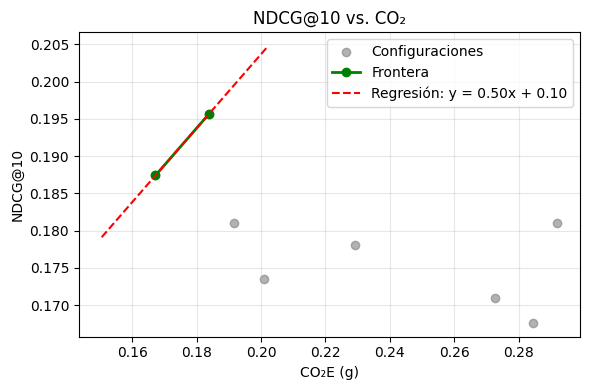

NDCG Frontier Linear Regression:
Slope (m): 0.4962
Intercept (b): 0.1045


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in deepfm_results_dict],
    [r['mean_ndcg'] for r in deepfm_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

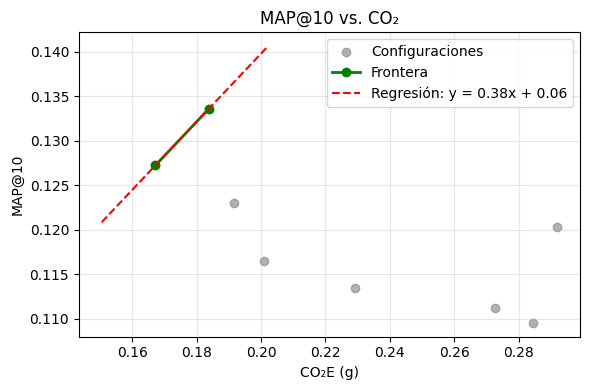

MAP Frontier Linear Regression:
Slope (m): 0.3829
Intercept (b): 0.0632


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in deepfm_results_dict],
    [r['mean_ap'] for r in deepfm_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_map = [r['co2e'] for r in map_frontier]
mean_ap_map = [r['mean_ap'] for r in map_frontier]


plt.plot(
    co2e_map,
    mean_ap_map,
    color='green', marker='o', linewidth=2, label='Frontera'
)

m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)
x_range_map = np.array([min(co2e_map) * 0.9, max(co2e_map) * 1.1])
plt.plot(x_range_map, m_map * x_range_map + b_map, color='red', linestyle='--', label=f'Regresión: y = {m_map:.2f}x + {b_map:.2f}')


plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_map:.4f}")
print(f"Intercept (b): {b_map:.4f}")

# Multivae

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from scipy import sparse
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')


In [ ]:


class VAEEncoder(nn.Module):
    def __init__(self, q_dims: List[int], dropout: List[float]):
        super().__init__()
        self.q_dims = q_dims
        q_dims_ = self.q_dims[:-1] + [self.q_dims[-1] * 2]
        self.q_layers = nn.Sequential()
        for i, (p, inp, out) in enumerate(zip(dropout, q_dims_[:-1], q_dims_[1:])):
            self.q_layers.add_module(f"dropout_{i}", nn.Dropout(p))
            self.q_layers.add_module(f"linear_{i}", nn.Linear(inp, out))

    def forward(self, X):
        h = F.normalize(X, p=2, dim=1)
        for i, layer in enumerate(self.q_layers):
            h = layer(h)
            if i != len(self.q_layers) - 1:
                h = torch.tanh(h)
            else:
                mu, logvar = torch.split(h, self.q_dims[-1], dim=1)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, p_dims: List[int], dropout: List[float]):
        super().__init__()
        self.p_layers = nn.Sequential()
        for i, (p, inp, out) in enumerate(zip(dropout, p_dims[:-1], p_dims[1:])):
            self.p_layers.add_module(f"dropout_{i}", nn.Dropout(p))
            self.p_layers.add_module(f"linear_{i}", nn.Linear(inp, out))

    def forward(self, X):
        h = X
        for i, layer in enumerate(self.p_layers):
            h = layer(h)
            if i != len(self.p_layers) - 1:
                h = torch.tanh(h)
        return h

class MultiVAE(nn.Module):
    def __init__(self, p_dims: List[int], q_dims: List[int],
                 dropout_enc: List[float], dropout_dec: List[float],
                 n_genres: int, genre_embedding_dim: int = 32):
        super().__init__()
        self.encode = VAEEncoder(q_dims, dropout_enc)
        self.decode = Decoder(p_dims, dropout_dec)


        self.n_genres = n_genres
        self.genre_embedding_dim = genre_embedding_dim
        self.genre_embedding = nn.Embedding(n_genres, genre_embedding_dim)
        self.genre_projection = nn.Linear(genre_embedding_dim, q_dims[-1])


        nn.init.xavier_uniform_(self.genre_embedding.weight)
        nn.init.xavier_uniform_(self.genre_projection.weight)
        self.genre_projection.bias.data.normal_(std=0.001)

    def forward(self, X, genre_weights=None):

        mu, logvar = self.encode(X)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        sampled_z = mu + float(self.training) * eps * std


        if genre_weights is not None:

            batch_size = X.shape[0] if len(X.shape) > 1 else 1

            if len(genre_weights.shape) == 2:

                genre_weights = genre_weights.unsqueeze(0).expand(batch_size, -1, -1)


            all_genre_embeddings = self.genre_embedding(
                torch.arange(self.n_genres, device=X.device)
            )


            weighted_genre_embeds = torch.matmul(
                genre_weights, all_genre_embeddings
            )


            genre_latent = self.genre_projection(weighted_genre_embeds)

            genre_influence = torch.mean(genre_latent, dim=1)

            enriched_z = sampled_z + genre_influence
            return self.decode(enriched_z), mu, logvar

        return self.decode(sampled_z), mu, logvar

class MultiVAERecommender:
    def __init__(self, n_items: int, genre_dict: Dict[int, List[int]],
                 n_genres: int, hidden_dim: int = 200, intermediate_dim: int = 600,
                 dropout_enc: float = 0.5, dropout_dec: float = 0.0,
                 lr: float = 0.001, batch_size: int = 500, weight_decay: float = 0.0001,
                 genre_embedding_dim: int = 32, genre_influence: float = 0.1):

        self.n_items = n_items
        self.genre_dict = genre_dict
        self.n_genres = n_genres
        self.genre_influence = genre_influence
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


        q_dims = [n_items, intermediate_dim, hidden_dim]
        p_dims = [hidden_dim, intermediate_dim, n_items]
        dropout_enc = [dropout_enc, 0.0]
        dropout_dec = [0.0, dropout_dec]

        self.model = MultiVAE(
            p_dims, q_dims, dropout_enc, dropout_dec,
            n_genres, genre_embedding_dim
        )
        self.model.to(self.device)

        self.genre_matrix = self._create_genre_matrix()

        self.batch_size = batch_size
        self.lr = lr
        self.weight_decay = weight_decay
        self.anneal_cap = 0.2
        self.constant_anneal = False

    def _create_genre_matrix(self):
        """Crear matriz de itemxgeneros"""
        genre_matrix = torch.zeros(self.n_items, self.n_genres, dtype=torch.float32)
        for item_id, genre_indices in self.genre_dict.items():
            if item_id < self.n_items:
                for genre_idx in genre_indices:
                    if genre_idx < self.n_genres:
                        genre_matrix[item_id, genre_idx] = 1.0
        return genre_matrix.to(self.device)


    def _vae_loss_fn(self, inp, out, mu, logvar, anneal):
        neg_ll = -torch.mean(torch.sum(F.log_softmax(out, 1) * inp, -1))
        KLD = -0.5 * torch.mean(torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1))
        return neg_ll + anneal * KLD

    def _data_to_tensor(self, data):
        if sparse.issparse(data):
            data = data.toarray()
        return torch.FloatTensor(data).to(self.device)

    def fit(self, train_data, valid_data=None, n_epochs: int = 50, verbose: bool = True):
        self.model.train()
        optimizer = torch.optim.AdamW(
            self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay
        )

        N = train_data.shape[0]
        training_steps = len(range(0, N, self.batch_size))
        total_anneal_steps = (training_steps * (n_epochs - int(n_epochs * 0.15))) / self.anneal_cap
        update_count = 0

        train_data_tensor = self._data_to_tensor(train_data)

        for epoch in range(n_epochs):
            running_loss = 0.0
            idxlist = list(range(N))
            np.random.shuffle(idxlist)

            for batch_idx, start_idx in enumerate(range(0, N, self.batch_size)):
                end_idx = min(start_idx + self.batch_size, N)
                batch_indices = idxlist[start_idx:end_idx]
                batch = train_data_tensor[batch_indices]

                if self.constant_anneal:
                    anneal = self.anneal_cap
                else:
                    anneal = min(self.anneal_cap, update_count / total_anneal_steps)
                update_count += 1

                optimizer.zero_grad()

                X_out, mu, logvar = self.model(batch, self.genre_matrix)
                loss = self._vae_loss_fn(batch, X_out, mu, logvar, anneal)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            avg_loss = running_loss / (batch_idx + 1)

            if verbose and (epoch % 10 == 0 or epoch == n_epochs - 1):
                print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")

    def predict(self, user_data, k: int = 10, exclude_seen: bool = True):
        """
        Generar recomendaciones topk para todos los usuarios
        """
        self.model.eval()

        with torch.no_grad():
            user_data_tensor = self._data_to_tensor(user_data)
            predictions, _, _ = self.model(user_data_tensor, self.genre_matrix)
            predictions = predictions.cpu().numpy()

            if exclude_seen:
                seen_mask = (user_data > 0).toarray() if sparse.issparse(user_data) else (user_data > 0)
                predictions[seen_mask] = -np.inf

            recommendations = []
            scores = []

            for user_pred in predictions:
                top_k_indices = np.argpartition(-user_pred, k)[:k]
                top_k_scores = user_pred[top_k_indices]

                sorted_indices = np.argsort(-top_k_scores)
                recommendations.append(top_k_indices[sorted_indices].tolist())
                scores.append(top_k_scores[sorted_indices].tolist())

            return recommendations, scores

    def recommend_for_user(self, user_interactions, k: int = 10, exclude_seen: bool = True):

        user_data = user_interactions.reshape(1, -1)
        recs, scores = self.predict(user_data, k, exclude_seen)
        return recs[0], scores[0]

Crear diccionario con id de generos

In [ ]:
#Obtener generos y mapearlos a indices
genres_set= set()
for genre_list in item_genre_dict.values():
  for genre in genre_list:
    genres_set.add(genre)

genres = list(genres_set)
genre2idx = {genre: idx for idx, genre in enumerate(genres)}
idx2genre = {idx: genre for genre, idx in genre2idx.items()}
item_genre_id_dict = {item_id: [genre2idx[genre] for genre in genre_list] for item_id, genre_list in item_genre_dict.items()}


In [ ]:
import itertools

hidden_dims = [50, 100]
intermediate_dims = [400]
learning_rates = [0.000001, 0.00001]
batch_sizes = [512, 1024]
dropout_rates = [0.2, 0.5, 0.8]
weight_decays = [0.0, 0.0001]
n_epochs = [10, 20]

multivae_configurations = []
for hidden_dim, intermediate_dim, lr, batch_size, dropout_enc, weight_decay, epochs in itertools.product(
    hidden_dims, intermediate_dims, learning_rates, batch_sizes, dropout_rates, weight_decays, n_epochs
):
    multivae_configurations.append({
        'hidden_dim': hidden_dim,
        'intermediate_dim': intermediate_dim,
        'learning_rate': lr,
        'batch_size': batch_size,
        'dropout_enc': dropout_enc,
        'weight_decay': weight_decay,
        'epochs': epochs
    })

In [ ]:
import time
n_items = train_df["item_id"].nunique()
multivae_results = []
for config in multivae_configurations:
    model = MultiVAERecommender(
        n_items=n_items,
        hidden_dim=config['hidden_dim'],
        intermediate_dim=config['intermediate_dim'],
        lr=config['learning_rate'],
        dropout_enc=config['dropout_enc'],
        batch_size=config['batch_size'],
        weight_decay=config['weight_decay'],
        genre_dict=item_genre_id_dict,
        n_genres=len(genres)
    )

    tracker = EmissionsTracker()

    tracker.start()
    start_time = time.time()
    model.fit(user_item_matrix, n_epochs=config["epochs"], verbose=False)
    end_time = time.time()
    tracker.stop()
    training_time = end_time - start_time
    co2e_tracker = tracker.final_emissions

    recommendations, _ = model.predict(user_item_matrix, k=10, exclude_seen=True)
    ctx["multivae_rec"] = recommendations

    mean_ndcg, mean_ap, mean_diversity, mean_novelty = get_base_metrics(model, 10, "multivae", ctx)
    map_c, ndcg_c, co2e = get_co2e_metrics(
        mean_ap,
        mean_ndcg,
        mean_ap_random,
        mean_ndcg_random,
        co2e_tracker
    )

    multivae_results.append({
        'hidden_dim': config['hidden_dim'],
        'intermediate_dim': config['intermediate_dim'],
        'learning_rate': config['learning_rate'],
        'batch_size': config['batch_size'],
        'dropout_enc': config['dropout_enc'],
        'weight_decay': config['weight_decay'],
        'epochs': config['epochs'],
        'map': mean_ap,
        'ndcg': mean_ndcg,
        'diversity': mean_diversity,
        'novelty': mean_novelty,
        'map_c': map_c,
        'ndcg_c': ndcg_c,
        'co2e': co2e,
        'time': training_time
    })



[codecarbon WARNING @ 02:40:25] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 02:40:25] [setup] RAM Tracking...
[codecarbon INFO @ 02:40:25] [setup] CPU Tracking...
[codecarbon WARNING @ 02:40:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 02:40:26] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 02:40:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon WARNING @ 02:40:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 02:40:26] [setup] GPU Tracking...
[codecarbon INFO @ 02:40:26] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 02:40:26] The below tracking methods have been set up:
                RAM Tracking Method: RAM po

In [ ]:
df_multivae_results = pd.DataFrame(multivae_results)

df_multivae_results.to_csv('multivae_results_tracker.csv', index=False)

In [ ]:
df_multivae_results = pd.read_csv('multivae_results_tracker.csv')
df_multivae_results.rename(columns={'map': 'mean_ap', 'ndcg': 'mean_ndcg'}, inplace=True)
multivae_results_dict = df_multivae_results.to_dict(orient='records')

In [ ]:
best_results = filter_for_efficiency_in_each_metric(multivae_results_dict)
map_frontier = pareto_filter(multivae_results_dict, 'mean_ap')
ndcg_frontier = pareto_filter(multivae_results_dict, 'mean_ndcg')

## Fronteras

In [ ]:
map_frontier.sort(key=lambda x: x['mean_ap'])
ndcg_frontier.sort(key=lambda x: x['mean_ndcg'])
df_map_frontier = pd.DataFrame(map_frontier)
df_ndcg_frontier = pd.DataFrame(ndcg_frontier)
df_map_frontier

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
0,50,400,0.000001,512,0.2,0.0000,20,0.040764,0.024440,9.696257,11.556294,1626.193001,-1408.227268,0.000984,7.492807
1,50,400,0.000001,1024,0.5,0.0001,10,0.062892,0.047781,7.604836,11.948353,85.497371,21.282314,0.044590,3.899096
2,50,400,0.000001,1024,0.8,0.0001,10,0.083693,0.069871,8.675886,11.287400,129.749497,69.537914,0.045413,3.933617
3,50,400,0.000010,1024,0.8,0.0000,10,0.118577,0.097337,10.210997,12.787549,202.960207,127.749642,0.046220,3.981310


In [ ]:
df_ndcg_frontier

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
0,50,400,0.000001,512,0.2,0.0000,20,0.040764,0.024440,9.696257,11.556294,1626.193001,-1408.227268,0.000984,7.492807
1,50,400,0.000001,1024,0.5,0.0001,10,0.062892,0.047781,7.604836,11.948353,85.497371,21.282314,0.044590,3.899096
2,50,400,0.000001,1024,0.8,0.0001,10,0.083693,0.069871,8.675886,11.287400,129.749497,69.537914,0.045413,3.933617
3,50,400,0.000010,1024,0.8,0.0000,10,0.118577,0.097337,10.210997,12.787549,202.960207,127.749642,0.046220,3.981310


## Mejores eficiencias

In [ ]:
best_ndcg_c = best_results["best_ndcg_c"]
best_map_c = best_results["best_map_c"]
print("Best NDCG-C model:", f"ndcg_c={best_ndcg_c['ndcg_c']} ,hidden_dim={best_ndcg_c['hidden_dim']}, intermediate_dim={best_ndcg_c['intermediate_dim']}, learning_rate={best_ndcg_c['learning_rate']}")
print("Best MAP-C model", f"map_c={best_ndcg_c['map_c']} ,hidden_dim={best_map_c['hidden_dim']}, intermediate_dim={best_map_c['intermediate_dim']}, learning_rate={best_map_c['learning_rate']}")


Best NDCG-C model: ndcg_c=127.7496419578231 ,hidden_dim=50, intermediate_dim=400, learning_rate=1e-05
Best MAP-C model map_c=202.9602066974608 ,hidden_dim=50, intermediate_dim=400, learning_rate=1e-06


## Gráficos multivae

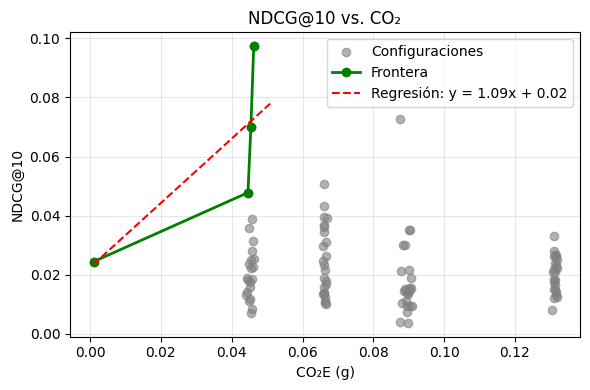

NDCG Frontier Linear Regression:
Slope (m): 1.0893
Intercept (b): 0.0225


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in multivae_results_dict],
    [r['mean_ndcg'] for r in multivae_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

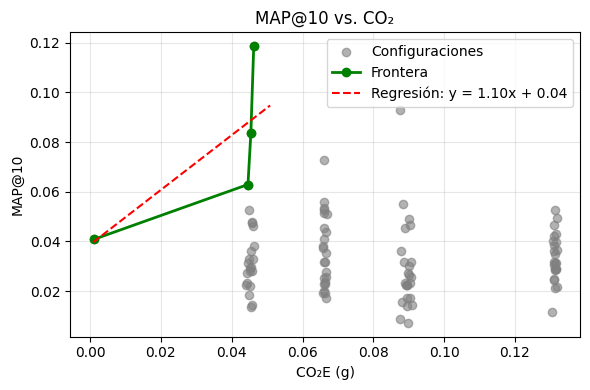

MAP Frontier Linear Regression:
Slope (m): 1.1017
Intercept (b): 0.0387


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in multivae_results_dict],
    [r['mean_ap'] for r in multivae_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in map_frontier]
mean_ndcg_ndcg = [r['mean_ap'] for r in map_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

## Analizar clusters de resultados

In [ ]:
df_multivae_results.sort_values(by='co2e', inplace=True)

In [ ]:
cluster_1 = df_multivae_results[df_multivae_results['co2e'] <0.03]
cluster_2 = df_multivae_results[(df_multivae_results['co2e'] > 0.03) & (df_multivae_results['co2e'] <0.04)]
cluster_3 = df_multivae_results[(df_multivae_results['co2e'] > 0.04) & (df_multivae_results['co2e'] <0.06)]
cluster_4 = df_multivae_results[(df_multivae_results['co2e'] > 0.06) & (df_multivae_results['co2e'] <0.08)]
cluster_5 = df_multivae_results[df_multivae_results['co2e'] > 0.08]

In [ ]:
cluster_1.head()

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
3,50,400,0.0001,512,0.2,0.0001,10,0.037235,0.024602,10.100530,12.317959,55.411200,-60.846304,0.022498,3.785751
6,50,400,0.0001,512,0.5,0.0000,10,0.026781,0.018358,7.633654,12.172244,8.816382,-87.321303,0.022827,3.841175
9,50,400,0.0001,512,0.5,0.0001,10,0.027481,0.017187,7.861047,12.434427,11.860050,-92.292573,0.022866,3.847811
12,50,400,0.0001,512,0.8,0.0000,10,0.032576,0.018829,9.571216,12.326420,34.056480,-84.902794,0.022923,3.857375
15,50,400,0.0001,512,0.8,0.0001,10,0.032345,0.017270,9.680026,11.635709,32.933652,-91.382055,0.023004,3.870962


Dimensión oculta: 50, dimensión intermedia: 400, epochs:10

In [ ]:
cluster_2.head()

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
144,100,400,0.0001,512,0.2,0.0000,10,0.029999,0.020005,9.163796,12.200714,15.385499,-53.796839,0.033991,5.719728
147,100,400,0.0001,512,0.2,0.0001,10,0.028982,0.018213,9.319974,12.069932,12.401918,-59.098319,0.033975,5.717091
150,100,400,0.0001,512,0.5,0.0000,10,0.030916,0.020608,8.757039,11.879587,18.216085,-52.396719,0.033748,5.678852
153,100,400,0.0001,512,0.5,0.0001,10,0.028878,0.018237,9.171083,12.471050,12.177736,-59.428518,0.033744,5.678263
156,100,400,0.0001,512,0.8,0.0000,10,0.030457,0.019818,9.560947,12.482503,16.894717,-54.864587,0.033670,5.665717


Dimensión oculta: 100, dimensión intermedia: 400, epochs:10

In [ ]:
cluster_3.head()

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
0,50,400,0.0001,512,0.2,0.0000,10,0.025699,0.014531,9.029149,12.087017,1.693851,-43.270629,0.054910,9.239883
1,50,400,0.0001,512,0.2,0.0000,20,0.029880,0.019458,8.721100,11.904218,11.634863,-42.875063,0.043926,7.391567
4,50,400,0.0001,512,0.2,0.0001,20,0.029538,0.019492,8.911560,12.053987,10.793480,-42.550896,0.044181,7.434455
7,50,400,0.0001,512,0.5,0.0000,20,0.029537,0.019491,8.997019,12.135784,10.723415,-42.284893,0.044461,7.481628
10,50,400,0.0001,512,0.5,0.0001,20,0.030424,0.020538,9.041570,12.129858,12.560252,-39.429852,0.045024,7.576265


Dimensión oculta: 50, dimensión intermedia: 400, epochs:20

In [ ]:
cluster_4.head()

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
2,50,400,0.0001,512,0.2,0.0000,30,0.029322,0.019206,8.947499,12.124886,6.946052,-29.115716,0.065551,11.030471
5,50,400,0.0001,512,0.2,0.0001,30,0.029676,0.019919,9.122226,12.056780,7.401073,-27.710137,0.066301,11.156760
8,50,400,0.0001,512,0.5,0.0000,30,0.030063,0.019578,9.061610,11.936395,7.982086,-28.214538,0.066325,11.160816
11,50,400,0.0001,512,0.5,0.0001,30,0.028739,0.018634,8.937065,12.040881,5.928847,-29.357284,0.066959,11.267425
14,50,400,0.0001,512,0.8,0.0000,30,0.029242,0.018701,9.144916,12.043021,6.668575,-29.207781,0.067073,11.286628


Dimensión oculta: 100 o 50, dimensión intermedia: 400, epochs:20 o 30

In [ ]:
cluster_5.head()

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
146,100,400,0.0001,512,0.2,0.0000,30,0.028536,0.018176,9.130010,11.967983,3.776986,-20.166759,0.099744,16.784348
149,100,400,0.0001,512,0.2,0.0001,30,0.031007,0.020017,9.020868,12.185999,6.251279,-18.311751,0.099794,16.792666
152,100,400,0.0001,512,0.5,0.0000,30,0.029051,0.018556,9.092912,12.146348,4.302657,-19.828475,0.099530,16.748323
155,100,400,0.0001,512,0.5,0.0001,30,0.029466,0.019384,9.075190,12.169984,4.697394,-18.907382,0.099997,16.826896
158,100,400,0.0001,512,0.8,0.0000,30,0.028635,0.018287,9.179695,12.166741,3.877721,-20.061576,0.099712,16.778900


Dimensión oculta: 100, dimensión intermedia: 400, epochs:30